Name-Vipul Anand
Assignment-Temperature forecast Project
Batch-DS2312

Project description-This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Problem Statement-You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset. So here we have to make two models one which predicts the maximum and one for the minimum temperature next dat

In [102]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [103]:
#The dataset
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [104]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [105]:
pd.set_option('display.max_columns',None)

In [106]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

So here we have been given this dataset which mainly consists of the prediction of LDAPS. And here we have to predict the net dat tmax and nexttmin. 
So let us analyse the columns in the dataset and proceed further

In [107]:
data.shape

(7752, 25)

In [ ]:
#So the dataset is large with 25 columns and 7752 rows

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [109]:
#It seems there are some nulls in the datatset let us  see that
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#So the data has some nulls . we will figure it out later on
As of now we will analyse the columns separately and we do the encoding and imputing accordingly

In [110]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
lab_enc=LabelEncoder()
one_hot=OneHotEncoder(sparse=False)
knn_imp=KNNImputer()
si=SimpleImputer()

In [111]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [112]:
#Station
data['station'].value_counts()

station
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: count, dtype: int64

In [113]:
#So the dataset is divided in to 25 stations and we will group them together and will encode them later on
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [114]:
#It also has nulls so let us fill them
data['station']=si.fit_transform(data[['station']])

In [116]:
data['station'].isna().sum()

0

In [117]:
index=data['station'].value_counts().sort_index().index

In [118]:
index[0:5]

Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='station')

In [119]:
#Now let us group them together
def station(value):
    if value in index[0:5]:
        return 'station1'
    if value in index[5:10]:
        return 'station2'
    if value in index[10:15]:
        return 'station3'
    if value in index[15:20]:
        return 'station4'
    if value in index[20:]:
        return 'station5'
data['station']=data['station'].apply(station)

In [120]:
data['station'].value_counts()

station
station3    1552
station1    1550
station2    1550
station4    1550
station5    1550
Name: count, dtype: int64

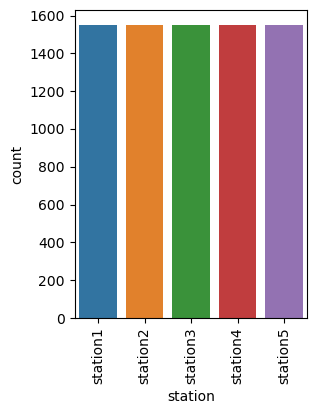

In [121]:
#Now let us one hot encode the columns after the visualization
plt.figure(figsize=(3,4))
sns.countplot(x=data['station'])
plt.xticks(rotation=90)
plt.show()

<Figure size 200x300 with 0 Axes>

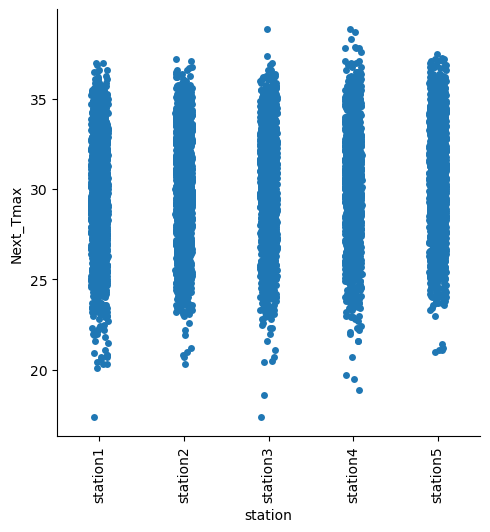

In [122]:
#All the stations are having a similar vaule count
#Let us see their relation with the label
plt.figure(figsize=(2,3))
sns.catplot(x=data['station'],y=data['Next_Tmax'])
plt.xticks(rotation=90)
plt.show()

<Figure size 200x300 with 0 Axes>

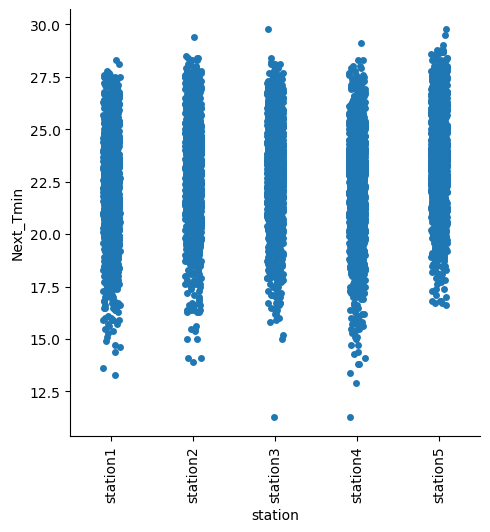

In [123]:
plt.figure(figsize=(2,3))
sns.catplot(x=data['station'],y=data['Next_Tmin'])
plt.xticks(rotation=90)
plt.show()

In [124]:
#So it's relation also seems to be very well with both the labels
station=one_hot.fit_transform(data[['station']])
station=pd.DataFrame(station,columns=['station1','station2','station3','station4','station5'])
station

station1  station2  station3  station4  station5
0          1.0       0.0       0.0       0.0       0.0
1          1.0       0.0       0.0       0.0       0.0
2          1.0       0.0       0.0       0.0       0.0
3          1.0       0.0       0.0       0.0       0.0
4          1.0       0.0       0.0       0.0       0.0
...        ...       ...       ...       ...       ...
7747       0.0       0.0       0.0       0.0       1.0
7748       0.0       0.0       0.0       0.0       1.0
7749       0.0       0.0       0.0       0.0       1.0
7750       0.0       0.0       1.0       0.0       0.0
7751       0.0       0.0       1.0       0.0       0.0

[7752 rows x 5 columns]

In [125]:
data=pd.concat([station,data],axis=1)
data=data.drop(columns='station')
data.head()

station1  station2  station3  station4  station5        Date  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0  30-06-2013          28.7   
1       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.9   
2       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.6   
3       1.0       0.0       0.0       0.0       0.0  30-06-2013          32.0   
4       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [ ]:
#So we have done the encoding,imputing and the analysis part of the station columns

In [126]:
data.head()

station1  station2  station3  station4  station5        Date  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0  30-06-2013          28.7   
1       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.9   
2       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.6   
3       1.0       0.0       0.0       0.0       0.0  30-06-2013          32.0   
4       1.0       0.0       0.0       0.0       0.0  30-06-2013          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [127]:
#The date columns
data['Date'].isna().sum()

2

In [128]:
si=SimpleImputer(strategy='most_frequent')

In [129]:
date=si.fit_transform(data[['Date']])

In [130]:
data['Date']=data['Date'].fillna(value=data['Date'].mode()[0])

In [131]:
data['Date'].isna().sum()

0

In [132]:
#Changing the date column to datetime format
data['Date']=pd.to_datetime(data['Date'])

In [133]:
data['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750   2013-07-01
7751   2013-07-01
Name: Date, Length: 7752, dtype: datetime64[ns]

In [134]:
#We will categorize the date columns to various types such a year,month and day
data['Day']=data['Date'].dt.day
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

In [135]:
#Day
data['Day'].value_counts()
def day(value):
    if value in range(1,11):
        return 'Starting month'
    if value in range(11,20):
        return 'Mid month'
    else:
        return 'end month'
data['Day']=data['Day'].apply(day)
data['Day'].value_counts()

Day
end month         3000
Starting month    2502
Mid month         2250
Name: count, dtype: int64

In [136]:
#let us also one hot encode it
day=one_hot.fit_transform(data[['Day']])
day=pd.DataFrame(day,columns=['Day1','Day2','Day3'])
data=pd.concat([day,data],axis=1)
data=data.drop(columns='Day') #Dropped the day column as we have already encoded it
data.head()

Day1  Day2  Day3  station1  station2  station3  station4  station5  \
0   0.0   0.0   1.0       1.0       0.0       0.0       0.0       0.0   
1   0.0   0.0   1.0       1.0       0.0       0.0       0.0       0.0   
2   0.0   0.0   1.0       1.0       0.0       0.0       0.0       0.0   
3   0.0   0.0   1.0       1.0       0.0       0.0       0.0       0.0   
4   0.0   0.0   1.0       1.0       0.0       0.0       0.0       0.0   

        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 2013-06-30          28.7          21.4    58.255688    91.116364   
1 2013-06-30          31.9          21.6    52.263397    90.604721   
2 2013-06-30          31.6          23.3    48.690479    83.973587   
3 2013-06-30          32.0          23.4    58.239788    96.483688   
4 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Year  Month  
0       21.2  2013      6  
1       22.5  2013      6  
2       23.9  2013      6  
3       24.3  2013      6  
4       22.5  2013      6

In [137]:
#month
data['Month'].value_counts()

Month
7    3877
8    3750
6     125
Name: count, dtype: int64

In [138]:
data['Month']=data['Month'].replace({6:8}) #replaced the 6 to 8 as it has very less value counts 

In [139]:
data['Month'].value_counts()

Month
7    3877
8    3875
Name: count, dtype: int64

In [140]:
month=one_hot.fit_transform(data[['Month']])
month=pd.DataFrame(month,columns=['Month1','Month2'])
data=pd.concat([month,data],axis=1)
data=data.drop(columns='Month')
data.head()

Month1  Month2  Day1  Day2  Day3  station1  station2  station3  station4  \
0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0       0.0   
1     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0       0.0   
2     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0       0.0   
3     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0       0.0   
4     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0       0.0   

   station5       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       0.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1       0.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2       0.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3       0.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4       0.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Year  
0       21.2  2013  
1       22.5  2013  
2       23.9  2013  
3       24.3  2013  
4       22.5  2013

In [141]:
#Year columns
data['Year'].value_counts()

Year
2013    1552
2014    1550
2015    1550
2016    1550
2017    1550
Name: count, dtype: int64

In [ ]:
#It's value count is very good and we can just directly encode it But before that le

<Figure size 300x400 with 0 Axes>

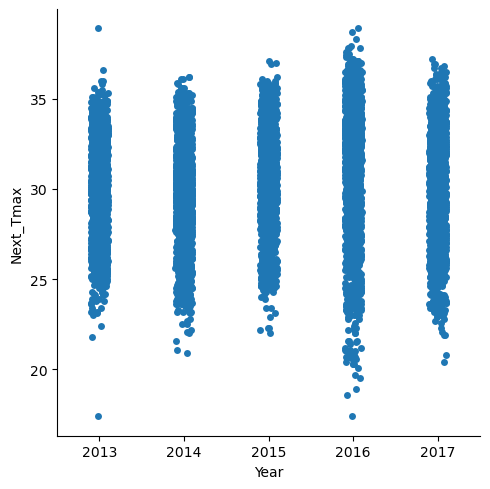

In [142]:
plt.figure(figsize=(3,4))
sns.catplot(x=data['Year'],y=data['Next_Tmax'])
plt.show()

<Figure size 300x400 with 0 Axes>

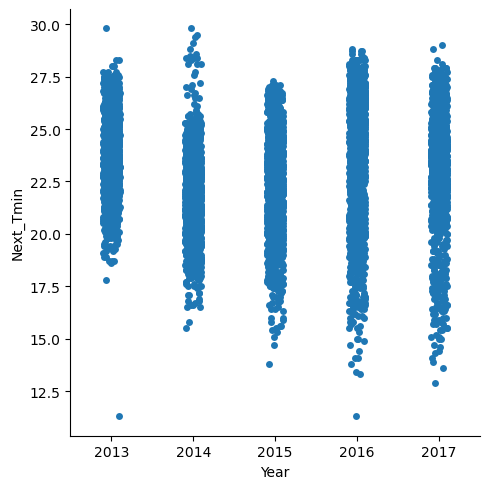

In [143]:
plt.figure(figsize=(3,4))
sns.catplot(x=data['Year'],y=data['Next_Tmin'])
plt.show()

In [144]:
data.groupby(['Year'])['Next_Tmin'].mean()

Year
2013    23.701808
2014    21.962750
2015    22.356291
2016    23.496962
2017    23.142913
Name: Next_Tmin, dtype: float64

In [145]:
data.groupby(['Year'])['Next_Tmax'].mean()

Year
2013    30.149968
2014    29.611491
2015    30.366213
2016    31.253070
2017    29.993368
Name: Next_Tmax, dtype: float64

from the graph also and from group we can see that the year 2013 had he highest tmin and the year 2016 had the highest tmax.

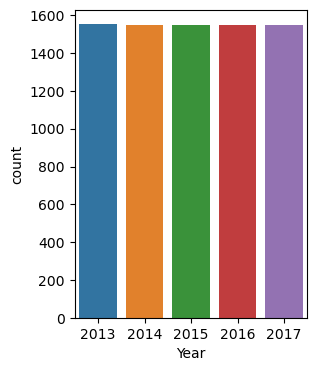

In [146]:
plt.figure(figsize=(3,4))
sns.countplot(x=data['Year'])
plt.show()

All the year have a similar value counts so there is no imbalance at al

In [147]:
year=one_hot.fit_transform(data[['Year']])
year=pd.DataFrame(year,columns=['year1','year2','year3','year4','year5'])
data=pd.concat([year,data],axis=1)
data=data.drop(columns='Year')
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5       Date  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0 2013-06-30          28.7   
1       1.0       0.0       0.0       0.0       0.0 2013-06-30          31.9   
2       1.0       0.0       0.0       0.0       0.0 2013-06-30          31.6   
3       1.0       0.0       0.0       0.0       0.0 2013-06-30          32.0   
4       1.0       0.0       0.0       0.0       0.0 2013-06-30          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [148]:
#Now we can also delete the date column as we made 3 parts of it and now this is just useless i think
data=data.drop(columns='Date')
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [149]:
data.describe()

year1        year2        year3        year4        year5  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.200206     0.199948     0.199948     0.199948     0.199948   
std       0.400181     0.399987     0.399987     0.399987     0.399987   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Month1       Month2         Day1         Day2         Day3  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.500129     0.499871     0.290248     0.322755     0.386997   
std       0.500032     0.500032     0.453906     0.467560     0.487094   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          station1     station2     station3     station4     station5  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.199948     0.199948     0.200206     0.199948     0.199948   
std       0.399987     0.399987     0.400181     0.399987     0.399987   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7682.000000   7682.000000  7677.000000  7677.000000       7677.000000   
mean      29.768211     23.225059    56.759372    88.374804         29.613447   
std        2.969999      2.413961    14.668111     7.192004          2.947191   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.700000    45.963543    84.222862         27.673499   
50%       29.900000     23.400000    55.039024    89.793480         29.703426   
75%       32.000000     24.900000    67.190056    93.743629         31.710450   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean          23.512589     7.097875    62.505019     0.368774     0.356080   
std            2.345347     2.183836    33.730589     0.262458     0.258061   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.089739     5.678705    37.266753     0.146654     0.140615   
50%           23.760199     6.547470    56.865482     0.315697     0.312421   
75%           25.152909     8.032276    84.223616     0.575489     0.558694   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

         LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.318404     0.299191     0.591995     0.485003     0.278200   
std       0.250362     0.254348     1.945768     1.762807     1.161809   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.101388     0.081532     0.000000     0.000000     0.000000   
50%       0.262555     0.227664     0.000000     0.000000     0.000000   
75%       0.496703     0.499489     0.052525     0.0

#The distribution of the dataset looks fine now let us visualize the continous columns we will impute the columns with nulls and we will see their distribution along with their relation with the labels

In [150]:
data['Present_Tmax'].value_counts()
#This columns is about the present temperature max and it has many values repeating so we can just group them together

Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: count, Length: 167, dtype: int64

In [151]:
pd.set_option('display.max_rows', None)

In [152]:
data['Present_Tmax'].isna().sum()

70

In [153]:
data['Present_Tmax']=data['Present_Tmax'].fillna(value=data['Present_Tmax'].mode()[0])
data['Present_Tmax'].isna().sum()

0

In [154]:
data['Present_Tmax'].value_counts().sort_index(ascending=False)

Present_Tmax
37.6      2
37.5      2
37.2      2
37.1      1
36.9      1
36.8      3
36.7      6
36.6      2
36.5      4
36.4      1
36.3      1
36.2      5
36.1      4
36.0     10
35.9     10
35.8      6
35.7     16
35.6      7
35.5     18
35.4     14
35.3     19
35.2     11
35.1     14
35.0     23
34.9     22
34.8     31
34.7     38
34.6     25
34.5     36
34.4     38
34.3     33
34.2     40
34.1     41
34.0     48
33.9     42
33.8     49
33.7     49
33.6     62
33.5     66
33.4     58
33.3     57
33.2     75
33.1     76
33.0     66
32.9     80
32.8     66
32.7     89
32.6     83
32.5     98
32.4     80
32.3     75
32.2    100
32.1     86
32.0     87
31.9    105
31.8     86
31.7     80
31.6     94
31.5     91
31.4    182
31.3     83
31.2     77
31.1     78
31.0     88
30.9     81
30.8     92
30.7     87
30.6    105
30.5     98
30.4     87
30.3    101
30.2     86
30.1     97
30.0    101
29.9     96
29.8     90
29.7    107
29.6     99
29.5     81
29.4    111
29.3     85
29.2    105
29.

In [155]:
#Instead of grouping this we will use this as it is. Because it is very well related to the label

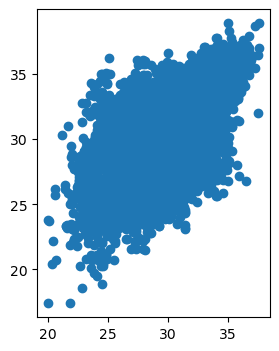

In [156]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['Present_Tmax'],y=data['Next_Tmax'])

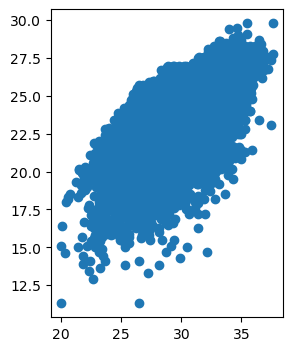

In [157]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['Present_Tmax'],y=data['Next_Tmin'])

#The relation can be seen  clearly and we are not interested in disturbing this relation by grouping them

In [165]:
data['Present_Tmin'].isna().sum()

0

In [159]:
data['Present_Tmin']=data['Present_Tmin'].fillna(value=data['Present_Tmin'].mean())
data['Present_Tmin'].isna().sum()

0

In [160]:
pd.set_option('display.max_rows', 10) #We need to keep changing the value counts time and again according to the needs 

In [161]:
data['Present_Tmin'].value_counts() 

Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: count, Length: 156, dtype: int64

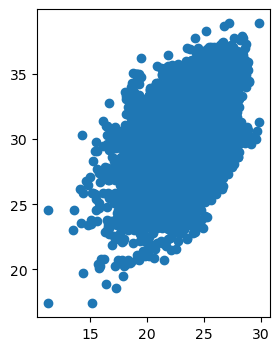

In [162]:
#Let us visualize it
plt.figure(figsize=(3,4))
plt.scatter(x=data['Present_Tmin'],y=data['Next_Tmax'])
plt.show()

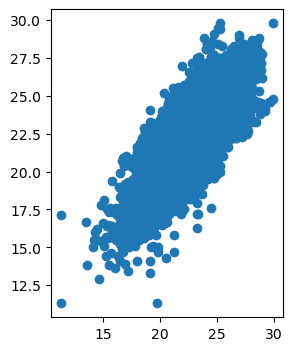

In [163]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['Present_Tmin'],y=data['Next_Tmin'])
plt.show()

#The realtion is again quite significant and these two columns seems to be very important for the label and it will be a very big mistake if we disturb this relation by grouping them

In [164]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

#Humidity columns which were predicted by the LDAPS

In [166]:
data['LDAPS_RHmin'].isna().sum()

75

In [167]:
data['LDAPS_RHmin'].value_counts()

LDAPS_RHmin
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: count, Length: 7672, dtype: int64

#THis is a continous columns altogether so we will use the knnimputer to fill the nulls in it as the knn can provide  accurate results

In [168]:
knn_imp=KNNImputer(n_neighbors=5)

In [169]:
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax
0             28.7          21.4    58.255688    91.116364
1             31.9          21.6    52.263397    90.604721
2             31.6          23.3    48.690479    83.973587
3             32.0          23.4    58.239788    96.483688
4             31.4          21.9    56.174095    90.155128
...            ...           ...          ...          ...
7747          23.3          17.1    26.741310    78.869858
7748          23.3          17.7    24.040634    77.294975
7749          23.2          17.4    22.933014    77.243744
7750          20.0          11.3    19.794666    58.936283
7751          37.6          29.9    98.524734   100.000153

[7752 rows x 4 columns]

In [170]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax']]=nulls

In [172]:
data['LDAPS_RHmax'].isna().sum()

0

In [173]:
data['LDAPS_RHmin'].isna().sum()

0

We have just filled the nulls of the humidity columns in one go with the knn taking reference from the present tmax  and tmin

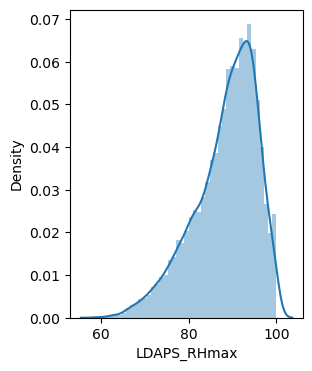

In [174]:
plt.figure(figsize=(3,4))
sns.distplot(data['LDAPS_RHmax'])
plt.show()

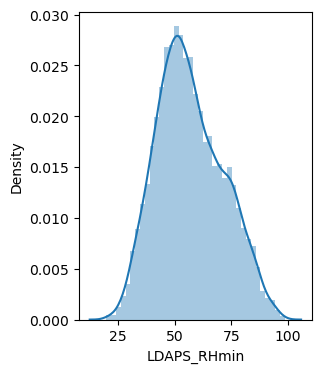

In [175]:
plt.figure(figsize=(3,4))
sns.distplot(data['LDAPS_RHmin'])
plt.show()

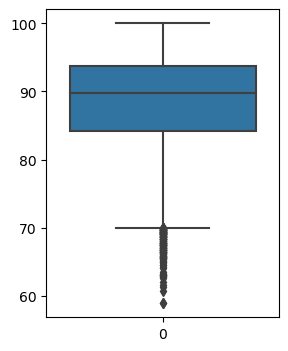

In [133]:
#Both of them are very very close to continous distribution
plt.figure(figsize=(3,4))
sns.boxplot(data['LDAPS_RHmax'])
plt.show()

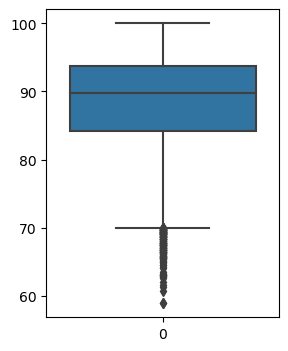

In [135]:
plt.figure(figsize=(3,4))
sns.boxplot(data['LDAPS_RHmax'])
plt.show()

In [ ]:
#There are some outliers in both of them which we will treat later on

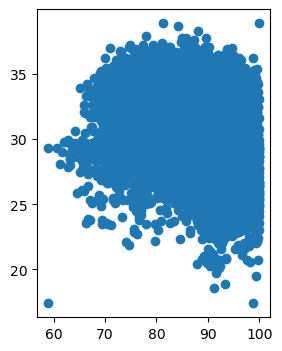

In [136]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['LDAPS_RHmax'],y=data['Next_Tmax'])
plt.show()

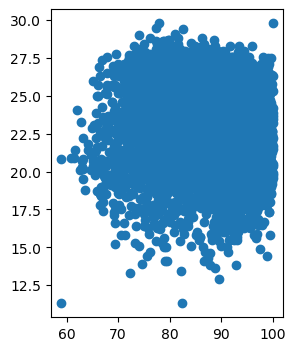

In [137]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['LDAPS_RHmax'],y=data['Next_Tmin'])
plt.show()

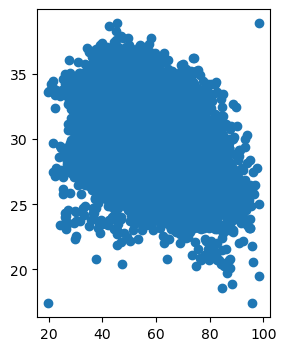

In [138]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['LDAPS_RHmin'],y=data['Next_Tmax'])
plt.show()

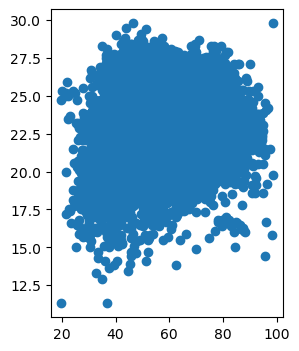

In [139]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['LDAPS_RHmin'],y=data['Next_Tmin'])
plt.show()

#There seems to be a relation between these two columns and the label. The relation might not be that significant but yes there
is a relation for sure

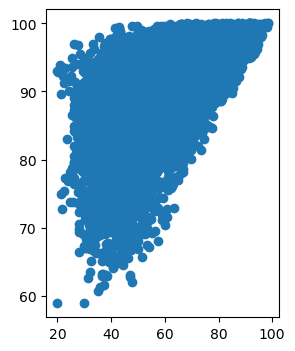

In [140]:
plt.figure(figsize=(3,4))
plt.scatter(x=data['LDAPS_RHmin'],y=data['LDAPS_RHmax'])
plt.show()

In [176]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [177]:
#Air remperature columns
data['LDAPS_Tmax_lapse'].isna().sum()

75

In [178]:
data['LDAPS_Tmax_lapse'].value_counts()

LDAPS_Tmax_lapse
17.624954    2
38.542255    2
28.074101    1
33.291634    1
32.784998    1
            ..
27.856410    1
26.984258    1
29.085588    1
28.209551    1
27.939516    1
Name: count, Length: 7675, dtype: int64

In [179]:
#Same we will be using the knn imputer for these two column also
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   
7750          20.0          11.3    19.794666    58.936283         17.624954   
7751          37.6          29.9    98.524734   100.000153         38.542255   

      LDAPS_Tmin_lapse  
0            23.006936  
1            24.035009  
2            24.565633  
3            23.326177  
4            23.486480  
...                ...  
7747         18.775678  
7748         18.733519  
7749         18.522965  
7750         14.272646  
7751         29.619342  

[7752 rows x 6 columns]

In [180]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']]=nulls

In [181]:
data['LDAPS_Tmax_lapse'].isna().sum()

0

In [182]:
data['LDAPS_Tmin_lapse'].isna().sum()

0

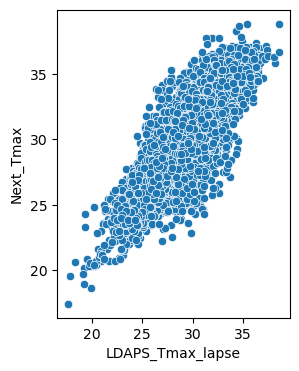

In [156]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_Tmax_lapse'],y=data['Next_Tmax'])
plt.show()

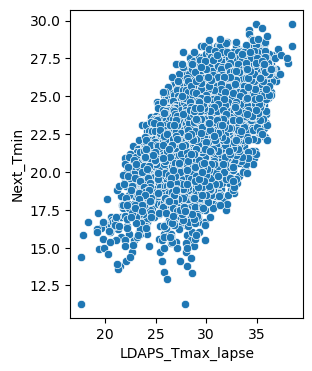

In [157]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_Tmax_lapse'],y=data['Next_Tmin'])
plt.show()

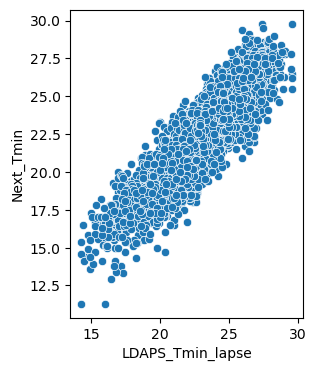

In [158]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_Tmin_lapse'],y=data['Next_Tmin'])
plt.show()

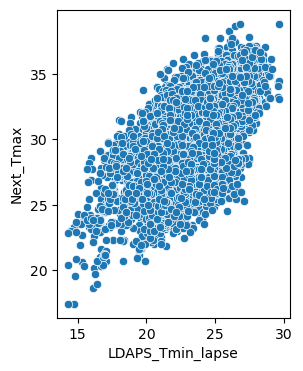

In [159]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_Tmin_lapse'],y=data['Next_Tmax'])
plt.show()

These two air temperate columns are also very important for the labels

In [183]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [184]:
#Wind speed
data['LDAPS_WS'].isna().sum()

75

In [185]:
data['LDAPS_WS'].value_counts()

LDAPS_WS
21.857621    2
2.882580     2
6.818887     1
7.772403     1
8.412426     1
            ..
6.411772     1
5.889227     1
6.131082     1
6.425350     1
7.289264     1
Name: count, Length: 7675, dtype: int64

In [186]:
#This is also a continous column and we will use the same knnimputer for this also
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax   LDAPS_WS
0             28.7          21.4    58.255688    91.116364   6.818887
1             31.9          21.6    52.263397    90.604721   5.691890
2             31.6          23.3    48.690479    83.973587   6.138224
3             32.0          23.4    58.239788    96.483688   5.650050
4             31.4          21.9    56.174095    90.155128   5.735004
...            ...           ...          ...          ...        ...
7747          23.3          17.1    26.741310    78.869858   6.148918
7748          23.3          17.7    24.040634    77.294975   6.542819
7749          23.2          17.4    22.933014    77.243744   7.289264
7750          20.0          11.3    19.794666    58.936283   2.882580
7751          37.6          29.9    98.524734   100.000153  21.857621

[7752 rows x 5 columns]

In [187]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS']]=nulls

In [188]:
data['LDAPS_WS'].isna().sum()

0

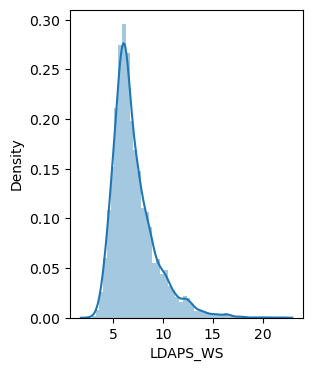

In [189]:
#Visualization part
plt.figure(figsize=(3,4))
sns.distplot(data['LDAPS_WS'])
plt.show()

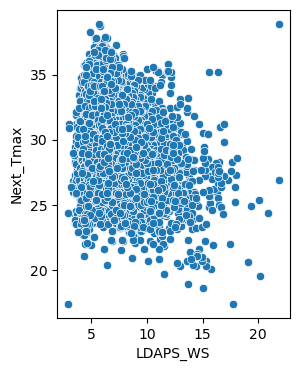

In [172]:
#Altough it has some outliers in the left side but the graph seems to be close to normal distribution
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_WS'],y=data['Next_Tmax'])
plt.show()

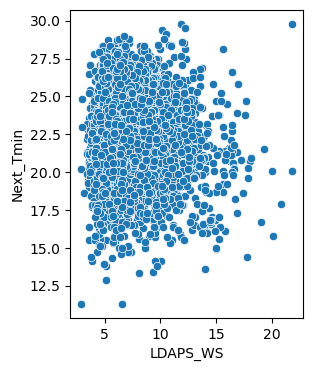

In [173]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_WS'],y=data['Next_Tmin'])
plt.show()

The relation is not quite significant and the choice to keep it or delete it. We will make a decesion on it later on

In [190]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [191]:
#Latent heat
data['LDAPS_LH'].isna().sum()

75

In [192]:
data['LDAPS_LH'].value_counts()

LDAPS_LH
-13.603212     2
 213.414006    2
 69.451805     1
 17.160774     1
 114.176182    1
              ..
 133.040326    1
 108.864598    1
 24.721477     1
 72.866500     1
 9.090034      1
Name: count, Length: 7675, dtype: int64

In [193]:
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_LH']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_LH'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax    LDAPS_LH
0             28.7          21.4    58.255688    91.116364   69.451805
1             31.9          21.6    52.263397    90.604721   51.937448
2             31.6          23.3    48.690479    83.973587   20.573050
3             32.0          23.4    58.239788    96.483688   65.727144
4             31.4          21.9    56.174095    90.155128  107.965535
...            ...           ...          ...          ...         ...
7747          23.3          17.1    26.741310    78.869858   72.058294
7748          23.3          17.7    24.040634    77.294975   47.241457
7749          23.2          17.4    22.933014    77.243744    9.090034
7750          20.0          11.3    19.794666    58.936283  -13.603212
7751          37.6          29.9    98.524734   100.000153  213.414006

[7752 rows x 5 columns]

In [194]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_LH']]=nulls

In [195]:
data['LDAPS_LH'].isna().sum()

0

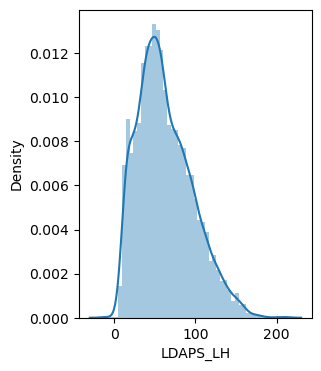

In [196]:
#Visualization part
plt.figure(figsize=(3,4))
sns.distplot(data['LDAPS_LH'])
plt.show()

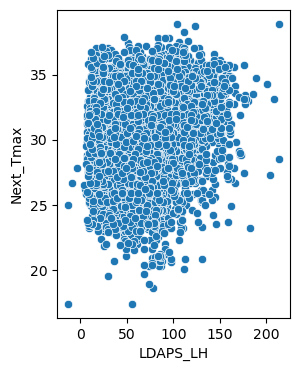

In [184]:
#This columns is very normally distributed
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_LH'],y=data['Next_Tmax'])
plt.show()

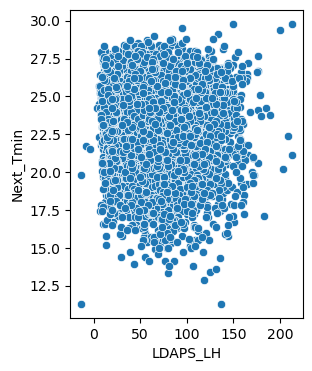

In [185]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['LDAPS_LH'],y=data['Next_Tmin'])
plt.show()

Some kind of relation can be seen in this feature with the label

In [186]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [197]:
#CLoud cover columns
data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']].isna().sum()

LDAPS_CC1    75
LDAPS_CC2    75
LDAPS_CC3    75
LDAPS_CC4    75
dtype: int64

In [198]:
data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']].value_counts()

LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4
0.000000   0.000000   0.000000   0.000000     1
0.465255   0.323221   0.363171   0.528271     1
0.466872   0.829750   0.612439   0.409796     1
0.466736   0.273898   0.177213   0.152060     1
0.466562   0.411627   0.371864   0.588920     1
                                             ..
0.210128   0.315420   0.133770   0.091880     1
0.210072   0.382992   0.052947   0.105650     1
0.209946   0.085611   0.268544   0.208290     1
0.209928   0.256546   0.139758   0.613603     1
0.967277   0.968353   0.983789   0.974710     1
Name: count, Length: 7677, dtype: int64

In [199]:
#These are also continous and we will use the knn to treat the nulls in this case also
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_CC1  \
0             28.7          21.4    58.255688    91.116364   0.233947   
1             31.9          21.6    52.263397    90.604721   0.225508   
2             31.6          23.3    48.690479    83.973587   0.209344   
3             32.0          23.4    58.239788    96.483688   0.216372   
4             31.4          21.9    56.174095    90.155128   0.151407   
...            ...           ...          ...          ...        ...   
7747          23.3          17.1    26.741310    78.869858   0.030034   
7748          23.3          17.7    24.040634    77.294975   0.035874   
7749          23.2          17.4    22.933014    77.243744   0.048954   
7750          20.0          11.3    19.794666    58.936283   0.000000   
7751          37.6          29.9    98.524734   100.000153   0.967277   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  
0      0.203896   0.161697   0.130928  
1      0.251771   0.159444   0.127727  
2      0.257469   0.204091   0.142125  
3      0.226002   0.161157   0.134249  
4      0.249995   0.178892   0.170021  
...         ...        ...        ...  
7747   0.081035   0.000000   0.000000  
7748   0.074962   0.000000   0.000000  
7749   0.059869   0.000000   0.000796  
7750   0.000000   0.000000   0.000000  
7751   0.968353   0.983789   0.974710  

[7752 rows x 8 columns]

#We have taken reference from the present tmax and the present tmin column to fill the nulls with help of the knn impuer

In [200]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']]=nulls

In [201]:
data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']].isna().sum()

LDAPS_CC1    0
LDAPS_CC2    0
LDAPS_CC3    0
LDAPS_CC4    0
dtype: int64

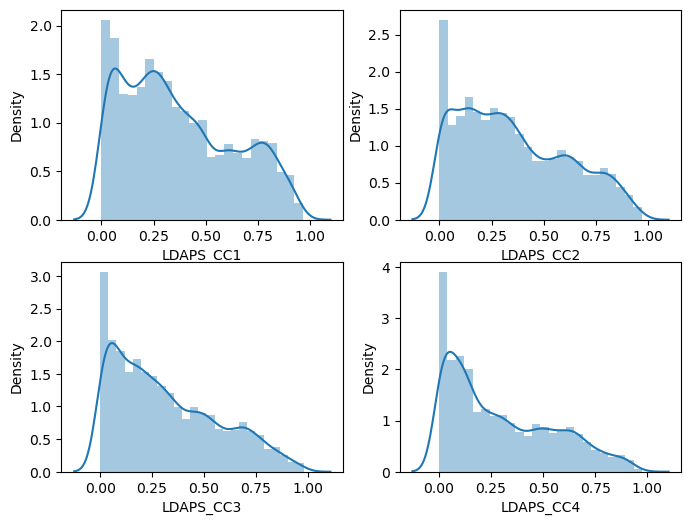

In [199]:
#So the nulls has been filled now let us check the distribution of these columns
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']]:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

#These coloumns are skewed on the right side 
Let us see their relation with the labels

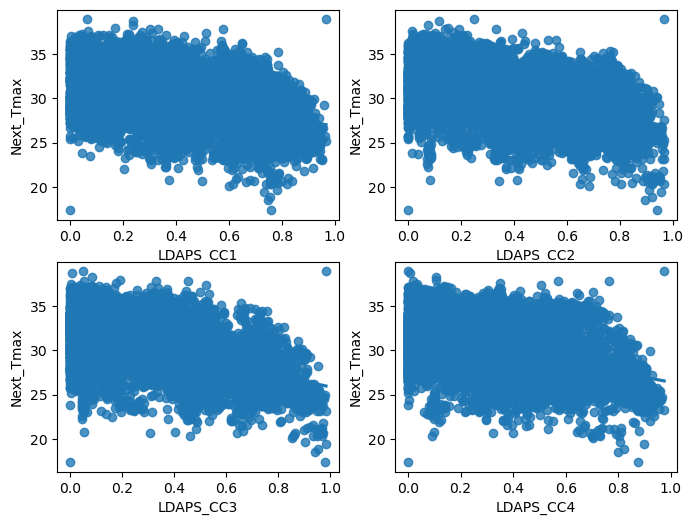

In [202]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']]:
    plt.subplot(2,2,plotnumber)
    sns.regplot(x=data[i],y=data['Next_Tmax'])
    plotnumber+=1
plt.show()

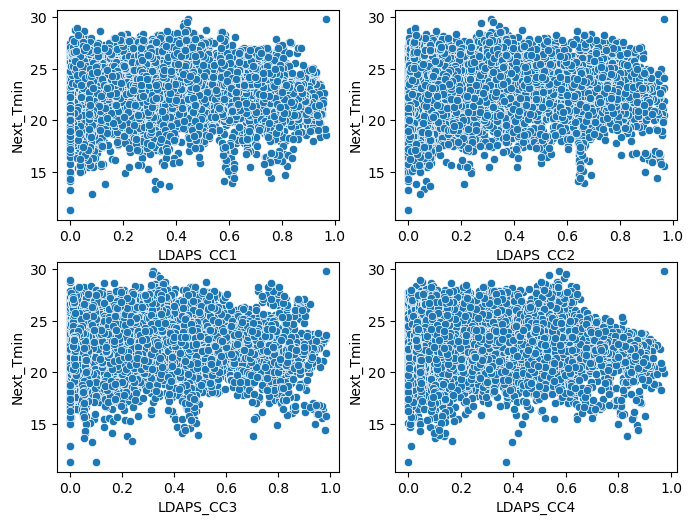

In [201]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']]:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=data[i],y=data['Next_Tmin'])
    plotnumber+=1
plt.show()

The relation of these columns with the label does not seems to be very significant
The call on whether to use these columns or not will be taken later on

In [203]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [202]:
#Percipitation columns
data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']].isna().sum()

LDAPS_PPT1    75
LDAPS_PPT2    75
LDAPS_PPT3    75
LDAPS_PPT4    75
dtype: int64

#We will use the knn imputer this time also
These four columns show the average percipitation for the next day in a 6 hour split that is why there are 4 columns for showing the percipitation

In [203]:
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'])
nulls

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_PPT1  \
0             28.7          21.4    58.255688    91.116364    0.000000   
1             31.9          21.6    52.263397    90.604721    0.000000   
2             31.6          23.3    48.690479    83.973587    0.000000   
3             32.0          23.4    58.239788    96.483688    0.000000   
4             31.4          21.9    56.174095    90.155128    0.000000   
...            ...           ...          ...          ...         ...   
7747          23.3          17.1    26.741310    78.869858    0.000000   
7748          23.3          17.7    24.040634    77.294975    0.000000   
7749          23.2          17.4    22.933014    77.243744    0.000000   
7750          20.0          11.3    19.794666    58.936283    0.000000   
7751          37.6          29.9    98.524734   100.000153   23.701544   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  
0       0.000000    0.000000    0.000000  
1       0.000000    0.000000    0.000000  
2       0.000000    0.000000    0.000000  
3       0.000000    0.000000    0.000000  
4       0.000000    0.000000    0.000000  
...          ...         ...         ...  
7747    0.000000    0.000000    0.000000  
7748    0.000000    0.000000    0.000000  
7749    0.000000    0.000000    0.000000  
7750    0.000000    0.000000    0.000000  
7751   21.621661   15.841235   16.655469  

[7752 rows x 8 columns]

In [204]:
data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]=nulls

In [205]:
data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']].value_counts()

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4
0.000000    0.000000    0.000000    0.000000      3131
0.001953    0.000000    0.000000    0.000000        10
0.002604    0.000000    0.000000    0.000000         3
0.051002    0.006869    0.000000    0.000000         2
0.001734    0.000000    0.000000    0.000000         2
                                                  ... 
0.000000    0.234043    0.082430    0.000000         1
            0.236205    0.000000    0.000000         1
            0.245168    0.000000    0.049081         1
            0.247997    0.000000    0.000671         1
23.701544   21.621661   15.841235   16.655469        1
Name: count, Length: 4603, dtype: int64

In [206]:
data['LDAPS_PPT1'].value_counts()

LDAPS_PPT1
0.000000     4859
0.001953       11
0.002604        5
0.001734        3
23.701544       2
             ... 
0.330527        1
0.302974        1
0.433955        1
0.257640        1
2.040502        1
Name: count, Length: 2868, dtype: int64

In [213]:
data['LDAPS_PPT2'].value_counts()

LDAPS_PPT2
0.000000    5167
0.001953       7
0.000781       3
0.000040       3
0.000086       2
            ... 
0.047651       1
0.025290       1
0.012846       1
0.020298       1
0.247997       1
Name: count, Length: 2563, dtype: int64

In [214]:
data['LDAPS_PPT3'].value_counts()

LDAPS_PPT3
0.000000     5317
0.001953       10
0.000852        4
0.002604        3
15.841235       2
             ... 
0.121254        1
0.043389        1
0.003503        1
0.019264        1
0.021030        1
Name: count, Length: 2405, dtype: int64

In [215]:
data['LDAPS_PPT4'].value_counts()

LDAPS_PPT4
0.000000     5777
0.001953        3
0.170748        2
16.655469       2
0.000710        2
             ... 
0.009690        1
0.005128        1
0.002683        1
0.005363        1
3.093815        1
Name: count, Length: 1964, dtype: int64

#Altough the most of the values here are 0 which means most of the times the average percipitation was 0 through out the whole day

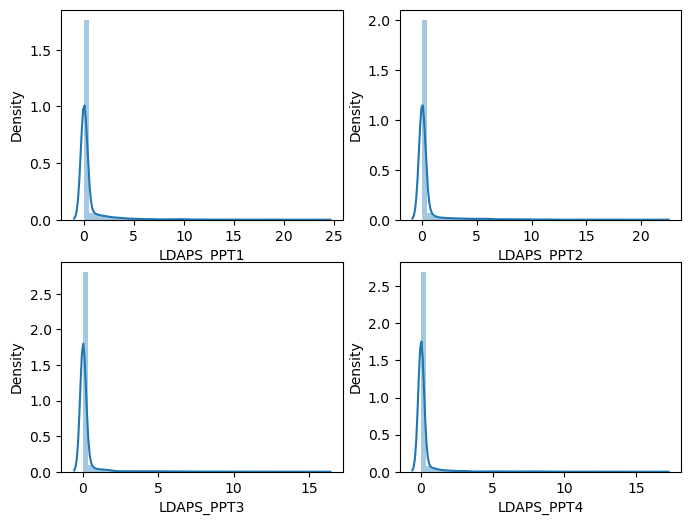

In [219]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

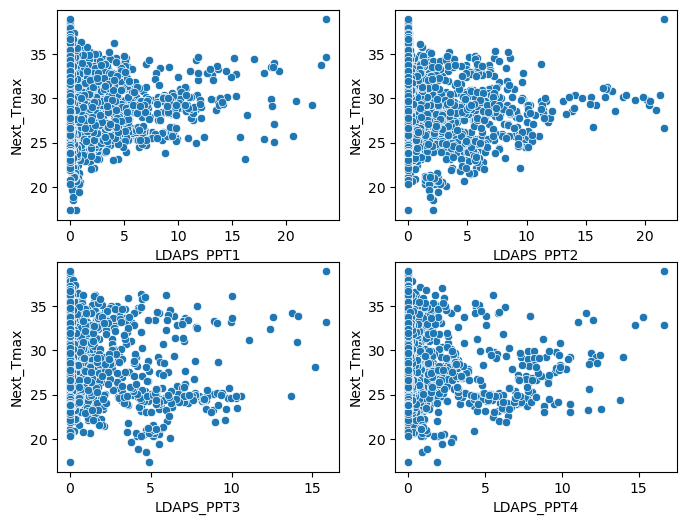

In [220]:
#There seems to be skewness in the dataset let us see their relation with the label
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=data[i],y=data['Next_Tmax'])
    plotnumber+=1
plt.show()

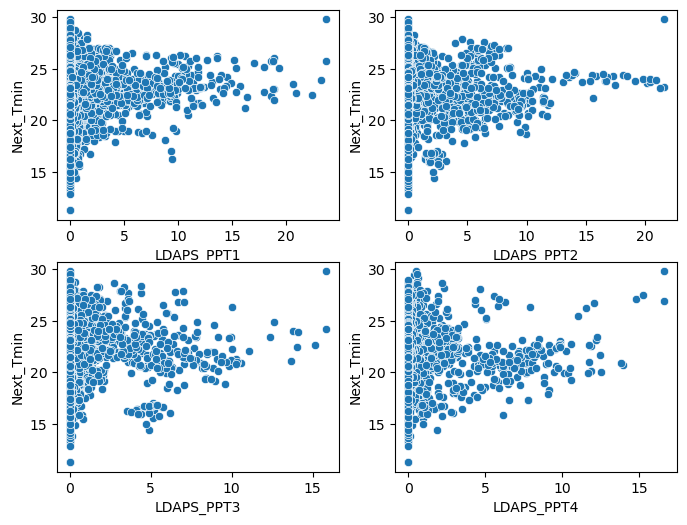

In [221]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=data[i],y=data['Next_Tmin'])
    plotnumber+=1
plt.show()

These columns mostly had zeroes so graph of this type is obvous. And the relation is not that significant but still some effect
can be seen clearly. The increase in the x leads to some changes in y also throughout the both labels

In [207]:
data.head()

year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0.0         0.0         0.0  37.6046  126.991  212.3350   
1         0.0         0.0         0.0         0.0  37.6046  127.032   44.7624   
2         0.0         0.0         0.0         0.0  37.5776  127.058   33.3068   
3         0.0         0.0         0.0         0.0  37.6450  127.022   45.7160   
4         0.0         0.0         0.0         0.0  37.5507  127.135   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5

In [ ]:
#latitude and longitude

In [208]:
data[['lat','lon']].isna().sum()

lat    0
lon    0
dtype: int64

#NO null which is a great thing 
So let us visualize the columns

<Axes: xlabel='lat', ylabel='Density'>

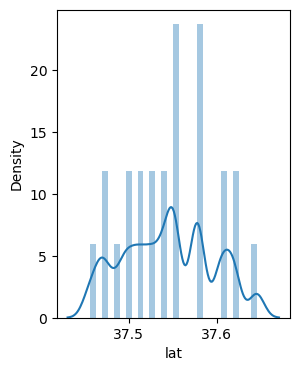

In [209]:
plt.figure(figsize=(3,4))
sns.distplot(data['lat'])

<Axes: xlabel='lon', ylabel='Density'>

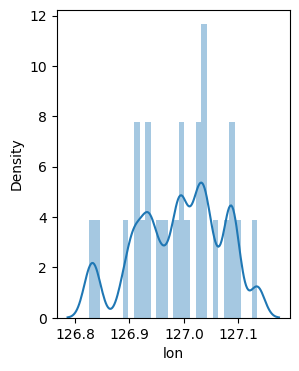

In [210]:
plt.figure(figsize=(3,4))
sns.distplot(data['lon'])

In [233]:
#The dataset is nor skewed but not is normal but it is not that skewd also which is good
data['lat'].value_counts()

lat
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
           ... 
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: count, Length: 12, dtype: int64

In [234]:
data['lon'].value_counts()

lon
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
          ... 
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: count, Length: 25, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

<Figure size 800x600 with 0 Axes>

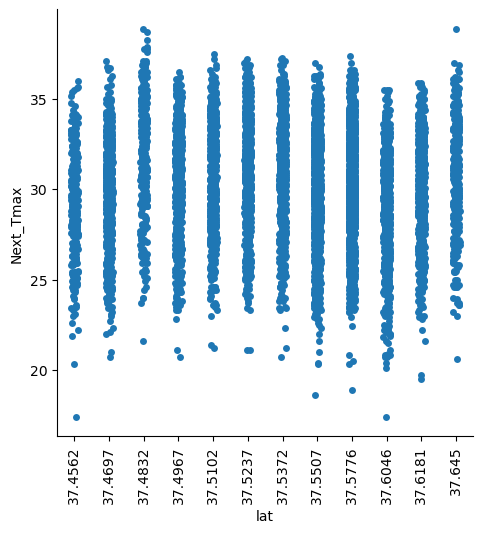

In [238]:
plt.figure(figsize=(8,6))
sns.catplot(x=data['lat'],y=data['Next_Tmax'])
plt.xticks(rotation=90)

#We can group the lat and lan because their value counts are in range of 12 and 10 so we can reduce them to 5-6 and later we can encode them also

In [240]:
#lat
pd.set_option('display.max_rows', 12)
data['lat'].value_counts()

lat
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: count, dtype: int64

In [211]:
index=data['lat'].value_counts().index

In [212]:
index

Index([37.5776, 37.5507, 37.6046, 37.5102, 37.4697, 37.4967, 37.5372, 37.6181,
       37.5237,  37.645, 37.4562, 37.4832],
      dtype='float64', name='lat')

In [213]:
def lati(value):
    if value ==index[0]:
        return 'lat1'
    if value==index[1]:
        return 'lat2'
    if value in index[2:4]:
        return 'lat3'
    if value in index[4:6]:
        return 'lat4'
    if value in index[6:8]:
        return 'lat5'
    if value in index[8:10]:
        return 'lat7'
    else:
        return 'lat8'
data['lat']=data['lat'].apply(lati)
data['lat'].value_counts()

lat
lat3    1240
lat1    1240
lat2    1240
lat4    1240
lat5    1240
lat7     931
lat8     621
Name: count, dtype: int64

In [214]:
encode=one_hot.fit_transform(data[['lat']])
encode=pd.DataFrame(encode,columns=['lat1','lat2','lat3','lat4','lat5','lat6','lat7'])
data=pd.concat([encode,data],axis=1)
data=data.drop(columns='lat')
data.head()

lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  year3  year4  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0    0.0    0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   

   year5  Month1  Month2  Day1  Day2  Day3  station1  station2  station3  \
0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
1    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
2    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
3    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
4    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   

   station4  station5  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       0.0       0.0          28.7          21.4    58.255688    91.116364   
1       0.0       0.0          31.9          21.6    52.263397    90.604721   
2       0.0       0.0          31.6          23.3    48.690479    83.973587   
3       0.0       0.0          32.0          23.4    58.239788    96.483688   
4       0.0       0.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [215]:
pd.set_option('display.max_rows', 25)
data['lon'].value_counts()

lon
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: count, dtype: int64

In [218]:
index=data['lon'].value_counts().sort_index().index
index

Index([126.826, 126.838, 126.891, 126.909,  126.91, 126.927, 126.937, 126.938,
       126.955,  126.97, 126.988, 126.991, 126.995, 127.004, 127.022, 127.024,
       127.032,  127.04, 127.042, 127.058, 127.083, 127.085, 127.086, 127.099,
       127.135],
      dtype='float64', name='lon')

In [217]:
len(index)

25

In [281]:
index[0:3]

Index([126.826, 126.838, 126.891], dtype='float64', name='lon')

In [219]:
def loni(value):
    if value in index[0:4]:
        return 'lat1'
    if value in index[4:8]:
        return 'lat2'
    if value in index[8:12]:
        return 'lat3'
    if value in index[12:16]:
        return 'lat4'
    if value in index[16:20]:
        return 'lat5'
    if value in index[20:]:
        return 'lat7'
    else:
        return 'lat8'
data['lon']=data['lon'].apply(loni)
data['lon'].value_counts()

lon
lat7    1551
lat1    1241
lat3    1240
lat5    1240
lat4    1240
lat2    1240
Name: count, dtype: int64

In [220]:
encode=one_hot.fit_transform(data[['lon']])
encode=pd.DataFrame(encode,columns=['lon1','lon2','lon3','lon4','lon5','lon6'])
data=pd.concat([encode,data],axis=1)
data=data.drop(columns='lon')
data.head()

lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   

   lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM   Slope  \
0         0.0         0.0         0.0         0.0  212.3350  2.7850   
1         0.0         0.0         0.0         0.0   44.7624  0.5141   
2         0.0         0.0         0.0         0.0   33.3068  0.2661   
3         0.0         0.0         0.0         0.0   45.7160  2.5348   
4         0.0         0.0         0.0         0.0   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5

In [221]:
#Dem elevation
data['DEM'].value_counts()

DEM
212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
21.9668     310
26.2980     310
146.5540    310
75.0924     310
56.4448     310
53.4712     310
82.2912     310
30.0464     310
59.8324     310
44.7624     310
132.1180    310
28.7000     310
208.5070    310
50.9312     310
52.5180     310
54.6384     310
35.0380     310
45.7160     310
33.3068     310
19.5844     310
Name: count, dtype: int64

In [222]:
#We can group this also
index=data['DEM'].value_counts().sort_index().index
index

Index([  12.37, 15.5876, 17.2956, 19.5844, 21.9668,  26.298,    28.7, 30.0464,
        30.968, 33.3068,  35.038, 44.7624,  45.716, 50.9312,  52.518, 53.4712,
       54.6384, 56.4448, 59.8324, 75.0924, 82.2912, 132.118, 146.554, 208.507,
       212.335],
      dtype='float64', name='DEM')

In [223]:
len(index)

25

In [224]:
def dem(value):
    if value in index[0:4]:
        return 'lat1'
    if value in index[4:8]:
        return 'lat2'
    if value in index[8:12]:
        return 'lat3'
    if value in index[12:16]:
        return 'lat4'
    if value in index[16:20]:
        return 'lat5'
    if value in index[20:]:
        return 'lat7'
    else:
        return 'lat8'
data['DEM']=data['DEM'].apply(dem)
data['DEM'].value_counts()

DEM
lat7    1551
lat1    1241
lat3    1240
lat4    1240
lat5    1240
lat2    1240
Name: count, dtype: int64

<Axes: xlabel='DEM', ylabel='count'>

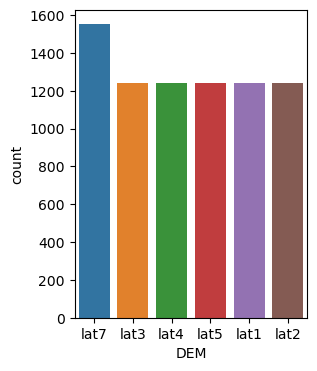

In [225]:
plt.figure(figsize=(3,4))
sns.countplot(x=data['DEM'])

In [ ]:
#All have similar value counts

In [226]:
encode=one_hot.fit_transform(data[['DEM']])
encode=pd.DataFrame(encode,columns=['DEM1','DEM2','DEM3','DEM4','DEM5','DEM6'])
data=pd.concat([encode,data],axis=1)
data=data.drop(columns='DEM')
data.head()

DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  lon5  lon6  \
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
2   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
4   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  year3  year4  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0    0.0    0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   

   year5  Month1  Month2  Day1  Day2  Day3  station1  station2  station3  \
0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
1    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
2    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
3    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   
4    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0       0.0   

   station4  station5  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       0.0       0.0          28.7          21.4    58.255688    91.116364   
1       0.0       0.0          31.9          21.6    52.263397    90.604721   
2       0.0       0.0          31.6          23.3    48.690479    83.973587   
3       0.0       0.0          32.0          23.4    58.239788    96.483688   
4       0.0       0.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4   Slope  Solar radiation  Next_Tmax  Next_Tmin  
0         0.0  2.7850      5992.895996       29.1       21.2  
1         0.0  0.5141      5869.312500       30.5       22.5  
2         0.0  0.2661      5863.555664       31.1       23.9  
3         0.0  2.5348      5856.964844       31.7       24.3  
4         0.0  0.5055      5859.552246       31.2       22.5

In [227]:
#slope
data['Slope'].value_counts()

Slope
2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
           ... 
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: count, Length: 27, dtype: int64

In [228]:
data['Slope'].isna().sum()

0

In [229]:
#no nulls and this columns also can be catorized
index=data['Slope'].value_counts().sort_index().index
index

Index([0.0984746,    0.0985,    0.1332,    0.1457,    0.1554,    0.2223,
          0.2661,    0.2713,    0.4125,    0.5055,    0.5141,    0.5721,
          0.5931,     0.618,    0.6233,     0.697,    0.8552,    1.2313,
          1.5629,    1.7678,    2.2579,    2.5348,    2.6865,     2.785,
          4.7296,    5.1782,   5.17823],
      dtype='float64', name='Slope')

In [230]:
def slope(value):
    if value in index[0:4]:
        return 'lat1'
    if value in index[4:8]:
        return 'lat2'
    if value in index[8:12]:
        return 'lat3'
    if value in index[12:16]:
        return 'lat4'
    if value in index[16:20]:
        return 'lat5'
    if value in index[20:]:
        return 'lat7'
data['Slope']=data['Slope'].apply(slope)
data['Slope'].value_counts()

Slope
lat7    1861
lat3    1240
lat2    1240
lat5    1240
lat4    1240
lat1     931
Name: count, dtype: int64

<Axes: xlabel='Slope', ylabel='count'>

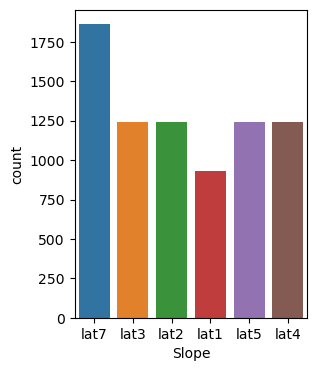

In [231]:
plt.figure(figsize=(3,4))
sns.countplot(x=data['Slope'])

<Figure size 300x400 with 0 Axes>

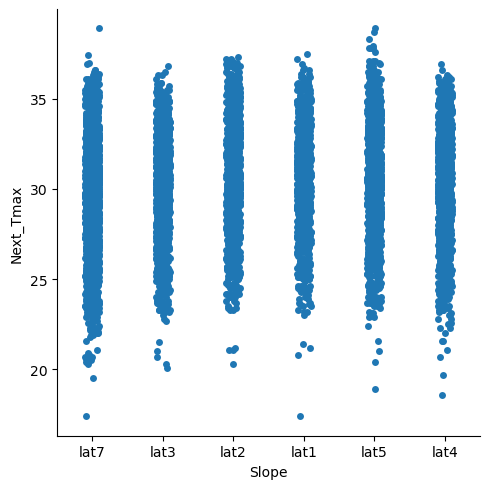

In [232]:
#All have similar value counts here also and let us analyse the relation with the labels
plt.figure(figsize=(3,4))
sns.catplot(x=data['Slope'],y=data['Next_Tmax'])

<Figure size 300x400 with 0 Axes>

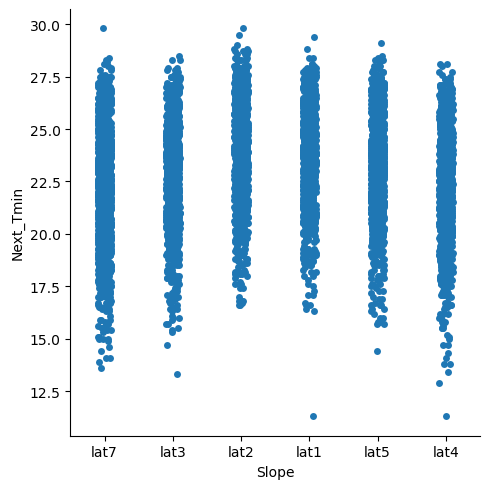

In [233]:
plt.figure(figsize=(3,4))
sns.catplot(x=data['Slope'],y=data['Next_Tmin'])

In [234]:
#There is ome kind of relation between the columns and we can clearly see this
encode=one_hot.fit_transform(data[['Slope']])
encode=pd.DataFrame(encode,columns=['slo1','slo2','slo3','slo4','slo5','slo6'])
data=pd.concat([encode,data],axis=1)
data=data.drop(columns='Slope')
data.head()

slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  \
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

   lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   

   lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Solar radiation  Next_Tmax  \
0         0.0         0.0         0.0         0.0      5992.895996       29.1   
1         0.0         0.0         0.0         0.0      5869.312500       30.5   
2         0.0         0.0         0.0         0.0      5863.555664       31.1   
3         0.0         0.0         0.0         0.0      5856.964844       31.7   
4         0.0         0.0         0.0         0.0      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [235]:
#Solar radiation 
data['Solar radiation'].isna().sum()

0

In [236]:
#NO nulls let us see the value counts and we can group it or not
data['Solar radiation'].value_counts()

Solar radiation
5992.895996    5
5131.895996    5
5124.781250    5
5165.472656    5
5147.032227    5
              ..
4408.542480    1
4418.823730    1
4423.769531    1
4575.028809    1
4411.375977    1
Name: count, Length: 1575, dtype: int64

#Here the value counts is very large and can not be grouped together and it is also not feasible to group ir anyhow
Let us see the distribution and it's relation with the label

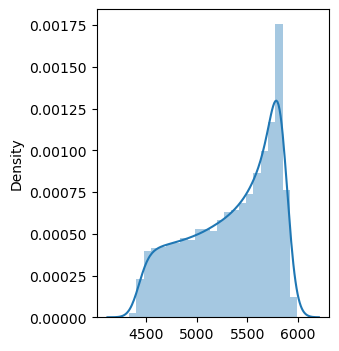

In [237]:
plt.figure(figsize=(3,4))
sns.distplot(x=data['Solar radiation'])
plt.show()

In [315]:
#CLose to normal with little skewness on the left side

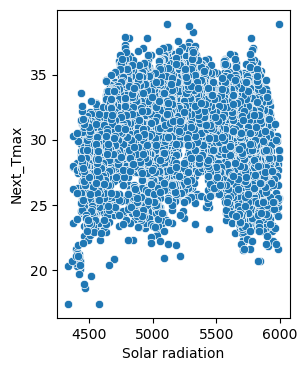

In [238]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['Solar radiation'],y=data['Next_Tmax'])
plt.show()

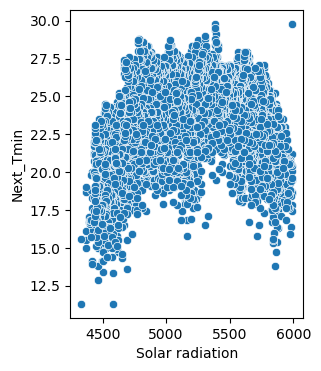

In [239]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['Solar radiation'],y=data['Next_Tmin'])
plt.show()

The relation does not seems to be very high but still there is some relation between this column and the label

In [240]:
data.head()

slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  \
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

   lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   

   lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Solar radiation  Next_Tmax  \
0         0.0         0.0         0.0         0.0      5992.895996       29.1   
1         0.0         0.0         0.0         0.0      5869.312500       30.5   
2         0.0         0.0         0.0         0.0      5863.555664       31.1   
3         0.0         0.0         0.0         0.0      5856.964844       31.7   
4         0.0         0.0         0.0         0.0      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [241]:
data['Next_Tmax'].isna().sum()

27

In [242]:
data['Next_Tmax'].value_counts()

Next_Tmax
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: count, Length: 183, dtype: int64

In [243]:
#We will use the knn to fill the nulls in both the labels
nulls=knn_imp.fit_transform(data[['Present_Tmax','Present_Tmin','Next_Tmax','Next_Tmin']])
nulls=pd.DataFrame(nulls,columns=['Present_Tmax','Present_Tmin','Next_Tmax','Next_Tmin'])
nulls

Present_Tmax  Present_Tmin  Next_Tmax  Next_Tmin
0             28.7          21.4       29.1       21.2
1             31.9          21.6       30.5       22.5
2             31.6          23.3       31.1       23.9
3             32.0          23.4       31.7       24.3
4             31.4          21.9       31.2       22.5
...            ...           ...        ...        ...
7747          23.3          17.1       28.3       18.1
7748          23.3          17.7       28.6       18.8
7749          23.2          17.4       27.8       17.4
7750          20.0          11.3       17.4       11.3
7751          37.6          29.9       38.9       29.8

[7752 rows x 4 columns]

In [244]:
data['Next_Tmin'].isna().sum()

27

In [245]:
data[['Present_Tmax','Present_Tmin','Next_Tmax','Next_Tmin']]=nulls

In [246]:
pd.set_option('display.max_rows', None)
data.isna().sum()

slo1                0
slo2                0
slo3                0
slo4                0
slo5                0
slo6                0
DEM1                0
DEM2                0
DEM3                0
DEM4                0
DEM5                0
DEM6                0
lon1                0
lon2                0
lon3                0
lon4                0
lon5                0
lon6                0
lat1                0
lat2                0
lat3                0
lat4                0
lat5                0
lat6                0
lat7                0
year1               0
year2               0
year3               0
year4               0
year5               0
Month1              0
Month2              0
Day1                0
Day2                0
Day3                0
station1            0
station2            0
station3            0
station4            0
station5            0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin

In [ ]:
#So all the nulls have been removed as of now

In [247]:
pd.set_option('display.max_rows', 10)

In [330]:
#Let uss see the label distribution and the relation beteen one and the other label

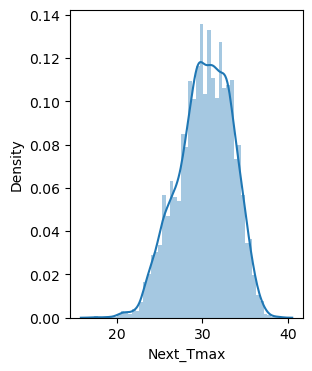

In [249]:
plt.figure(figsize=(3,4))
sns.distplot(data['Next_Tmax'])
plt.show()

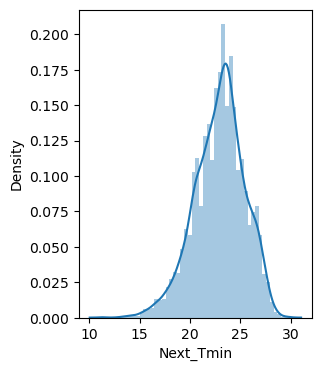

In [250]:
plt.figure(figsize=(3,4))
sns.distplot(data['Next_Tmin'])
plt.show()

This is very close to perfect normal distribution
Now let us see the relation of one label to the other

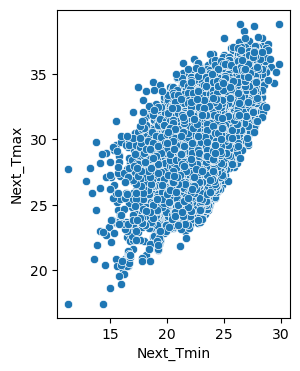

In [333]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['Next_Tmin'],y=data['Next_Tmax'])
plt.show()

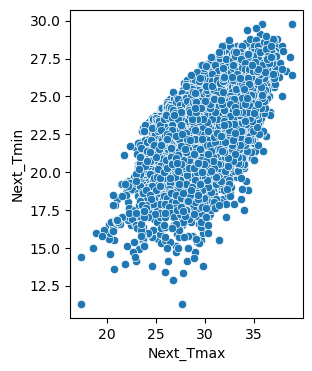

In [334]:
plt.figure(figsize=(3,4))
sns.scatterplot(x=data['Next_Tmax'],y=data['Next_Tmin'])
plt.show()

A very strong relation can be clearly seen between both the labels which can be really very beneficial to our model
The visualization and the filling of nulls has been done throughout the entire model
Let us detect the outliers and remove them after that we can do to the model building phase
Here we have to make 2 model for both the labels

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   slo1              7752 non-null   float64
 1   slo2              7752 non-null   float64
 2   slo3              7752 non-null   float64
 3   slo4              7752 non-null   float64
 4   slo5              7752 non-null   float64
 5   slo6              7752 non-null   float64
 6   DEM1              7752 non-null   float64
 7   DEM2              7752 non-null   float64
 8   DEM3              7752 non-null   float64
 9   DEM4              7752 non-null   float64
 10  DEM5              7752 non-null   float64
 11  DEM6              7752 non-null   float64
 12  lon1              7752 non-null   float64
 13  lon2              7752 non-null   float64
 14  lon3              7752 non-null   float64
 15  lon4              7752 non-null   float64
 16  lon5              7752 non-null   float64


In [337]:
data.isna().sum()

slo1               0
slo2               0
slo3               0
slo4               0
slo5               0
                  ..
LDAPS_PPT3         0
LDAPS_PPT4         0
Solar radiation    0
Next_Tmax          0
Next_Tmin          0
Length: 59, dtype: int64

In [338]:
#NO null now

In [339]:
data

slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  \
0      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7747   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7748   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7749   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7750   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7751   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   

      lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7747   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7748   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
7749   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
7750   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7751   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   

      lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  \
0      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
1      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
2      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
3      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
4      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
...    ...    ...    ...    ...    ...    ...     ...     ...   ...   ...   
7747   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7748   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7749   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7750   1.0    1.0    0.0    0.0    0.0    0.0     1.0     0.0   0.0   1.0   
7751   0.0    1.0    0.0    0.0    0.0    0.0     1.0     0.0   0.0   1.0   

      Day3  station1  station2  station3  station4  station5  Present_Tmax  \
0      1.0       1.0       0.0       0.0       0.0       0.0          28.7   
1      1.0       1.0       0.0       0.0       0.0       0.0          31.9   
2      1.0       1.0       0.0       0.0       0.0       0.0          31.6   
3      1.0       1.0       0.0       0.0       0.0       0.0          32.0   
4      1.0       1.0       0.0       0.0       0.0       0.0          31.4   
...    ...       ...       ...       ...       ...       ...           ...   
7747   1.0       0.0       0.0       0.0       0.0       1.0          23.3   
7748   1.0       0.0       0.0       0.0       0.0       1.0          23.3   
7749   1.0       0.0       0.0       0.0       0.0       1.0          23.2   
7750   0.0       0.0       0.0       1.0       0.0       0.0          20.0   
7751   0.0       0.0       0.0       1.0       0.0       0.0          37.6   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             21.4    58.255688    91.116364         28.074101   
1             21.6    52.263397    90.604721         29.850689   
2             23.3    48

In [251]:
data.isna().sum()

slo1               0
slo2               0
slo3               0
slo4               0
slo5               0
                  ..
LDAPS_PPT3         0
LDAPS_PPT4         0
Solar radiation    0
Next_Tmax          0
Next_Tmin          0
Length: 59, dtype: int64

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   slo1              7752 non-null   float64
 1   slo2              7752 non-null   float64
 2   slo3              7752 non-null   float64
 3   slo4              7752 non-null   float64
 4   slo5              7752 non-null   float64
 5   slo6              7752 non-null   float64
 6   DEM1              7752 non-null   float64
 7   DEM2              7752 non-null   float64
 8   DEM3              7752 non-null   float64
 9   DEM4              7752 non-null   float64
 10  DEM5              7752 non-null   float64
 11  DEM6              7752 non-null   float64
 12  lon1              7752 non-null   float64
 13  lon2              7752 non-null   float64
 14  lon3              7752 non-null   float64
 15  lon4              7752 non-null   float64
 16  lon5              7752 non-null   float64


#So as if now all the values in the column are nulls and we have succesfully treated all the nulls in the dataframe and we have also encoded all the categorical data along 
Now we are left with the outlier detection and removal of them in the continous columns

In [253]:
data.head()

slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  \
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

   lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   

   lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  Day3  \
0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
1   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
2   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
3   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   
4   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0   

   station1  station2  station3  station4  station5  Present_Tmax  \
0       1.0       0.0       0.0       0.0       0.0          28.7   
1       1.0       0.0       0.0       0.0       0.0          31.9   
2       1.0       0.0       0.0       0.0       0.0          31.6   
3       1.0       0.0       0.0       0.0       0.0          32.0   
4       1.0       0.0       0.0       0.0       0.0          31.4   

   Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
0          21.4    58.255688    91.116364         28.074101         23.006936   
1          21.6    52.263397    90.604721         29.850689         24.035009   
2          23.3    48.690479    83.973587         30.091292         24.565633   
3          23.4    58.239788    96.483688         29.704629         23.326177   
4          21.9    56.174095    90.155128         29.113934         23.486480   

   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
0  6.818887   69.451805   0.233947   0.203896   0.161697   0.130928   
1  5.691890   51.937448   0.225508   0.251771   0.159444   0.127727   
2  6.138224   20.573050   0.209344   0.257469   0.204091   0.142125   
3  5.650050   65.727144   0.216372   0.226002   0.161157   0.134249   
4  5.735004  107.965535   0.151407   0.249995   0.178892   0.170021   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Solar radiation  Next_Tmax  \
0         0.0         0.0         0.0         0.0      5992.895996       29.1   
1         0.0         0.0         0.0         0.0      5869.312500       30.5   
2         0.0         0.0         0.0         0.0      5863.555664       31.1   
3         0.0         0.0         0.0         0.0      5856.964844       31.7   
4         0.0         0.0         0.0         0.0      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [254]:
data.columns

Index(['slo1', 'slo2', 'slo3', 'slo4', 'slo5', 'slo6', 'DEM1', 'DEM2', 'DEM3',
       'DEM4', 'DEM5', 'DEM6', 'lon1', 'lon2', 'lon3', 'lon4', 'lon5', 'lon6',
       'lat1', 'lat2', 'lat3', 'lat4', 'lat5', 'lat6', 'lat7', 'year1',
       'year2', 'year3', 'year4', 'year5', 'Month1', 'Month2', 'Day1', 'Day2',
       'Day3', 'station1', 'station2', 'station3', 'station4', 'station5',
       'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Let us first get the continous columns of our dataframe so that we can treat them
We will not be treating the label columns here. we will treat them later on when we will finish treating the continous feature columns.

In [295]:
continous_columns=['LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']

#We have already seen the distribution of all the continous columns and their relatio  with the labels 
Now we need to treat the outliers present in them

In [309]:
data[continous_columns].skew()

LDAPS_Tmax_lapse   -0.234344
LDAPS_Tmin_lapse   -0.586210
LDAPS_WS            1.577350
LDAPS_LH            0.670182
LDAPS_CC1           0.458230
LDAPS_CC2           0.469130
LDAPS_CC3           0.637398
LDAPS_CC4           0.663921
LDAPS_PPT1          5.381967
LDAPS_PPT2          5.735741
LDAPS_PPT3          6.450790
LDAPS_PPT4          6.799119
Solar radiation    -0.511210
dtype: float64

In [310]:
from scipy.stats import zscore

In [313]:
corr=data[['LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation','Next_Tmax', 'Next_Tmin']].corr()

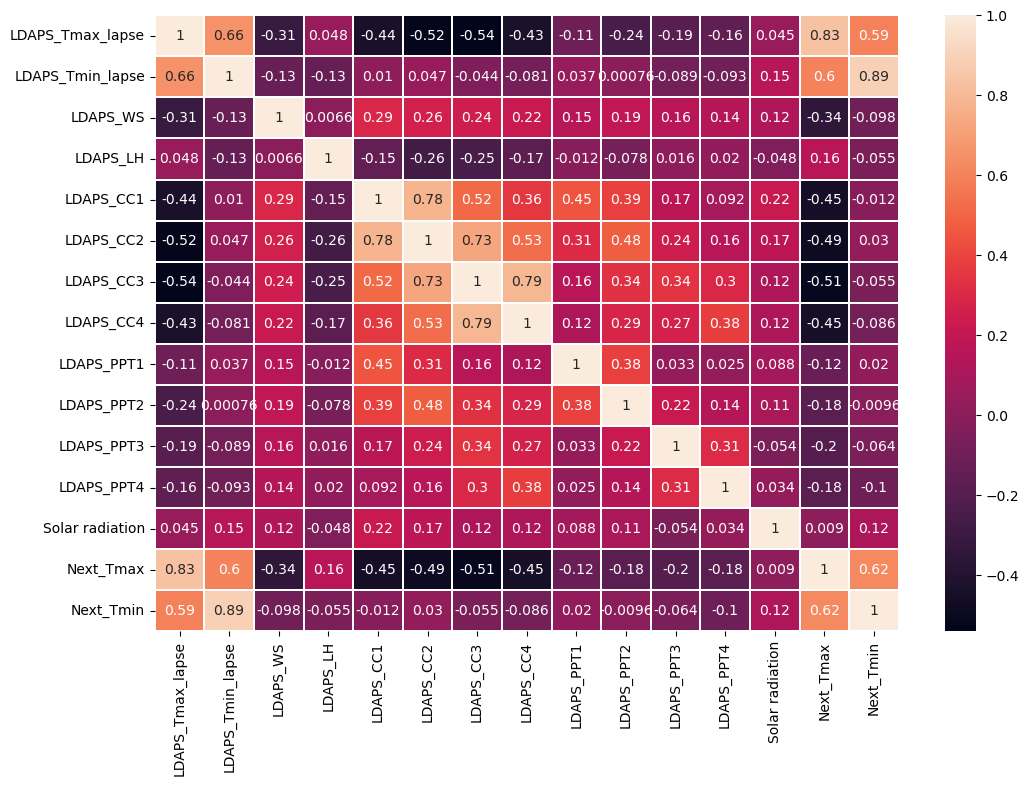

In [314]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,linewidths=0.1,annot=True)
plt.show()

In [316]:
data[continous_columns].skew()

LDAPS_Tmax_lapse   -0.234344
LDAPS_Tmin_lapse   -0.586210
LDAPS_WS            1.577350
LDAPS_LH            0.670182
LDAPS_CC1           0.458230
LDAPS_CC2           0.469130
LDAPS_CC3           0.637398
LDAPS_CC4           0.663921
LDAPS_PPT1          5.381967
LDAPS_PPT2          5.735741
LDAPS_PPT3          6.450790
LDAPS_PPT4          6.799119
Solar radiation    -0.511210
dtype: float64

#We can see that the percipitation columns are the ones with most skewness and their relation with the label is also not that much in the correlation matrix. So one thing which we can do here is that we can transform this percipitation column and than remove the outliers. becaus this can remove the outliers by a large margin because the rest of the data columns are not that skewed

In [317]:
score=zscore(data[['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']])

In [332]:
 index=np.where(np.abs(score)>3)[0]

In [333]:
index

array([  25,   26,   27,   28,   29,   30,   33,   35,   36,   37,   38,
         39,   41,   43,   44,   45,   46,   47,   48,   49,  150,  151,
        152,  153,  154,  155,  156,  157,  158,  159,  160,  161,  162,
        163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,
        174,  279,  280,  282,  283,  284,  285,  286,  288,  289,  290,
        292,  295,  296,  297,  298,  299,  304,  305,  305,  307,  307,
        308,  308,  309,  309,  310,  310,  311,  311,  312,  313,  313,
        314,  315,  315,  317,  317,  320,  321,  321,  322,  323,  323,
        324,  324,  325,  326,  327,  328,  329,  331,  337,  339,  341,
        343,  344,  347,  353,  356,  369,  402,  411,  413,  416,  424,
        525,  525,  526,  526,  527,  528,  528,  529,  530,  530,  531,
        531,  532,  532,  533,  533,  534,  534,  535,  536,  536,  537,
        538,  538,  539,  539,  540,  540,  541,  542,  542,  543,  543,
        544,  544,  545,  545,  546,  547,  547,  5

In [339]:
len(index)

760

#So these 4 columns alone have 760 outliers 
so it is better to romove them

In [340]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [355]:
transformed=pt.fit_transform(data[['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']])
transformed=pd.DataFrame(transformed,columns=['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'])
transformed

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4
0      -0.563751   -0.523808   -0.498384   -0.449868
1      -0.563751   -0.523808   -0.498384   -0.449868
2      -0.563751   -0.523808   -0.498384   -0.449868
3      -0.563751   -0.523808   -0.498384   -0.449868
4      -0.563751   -0.523808   -0.498384   -0.449868
...          ...         ...         ...         ...
7747   -0.563751   -0.523808   -0.498384   -0.449868
7748   -0.563751   -0.523808   -0.498384   -0.449868
7749   -0.563751   -0.523808   -0.498384   -0.449868
7750   -0.563751   -0.523808   -0.498384   -0.449868
7751    2.182127    2.367124    2.541766    2.674810

[7752 rows x 4 columns]

In [356]:
Score=zscore(transformed)

In [358]:
index=np.where(np.abs(Score)>3)[0]
len(index)

0

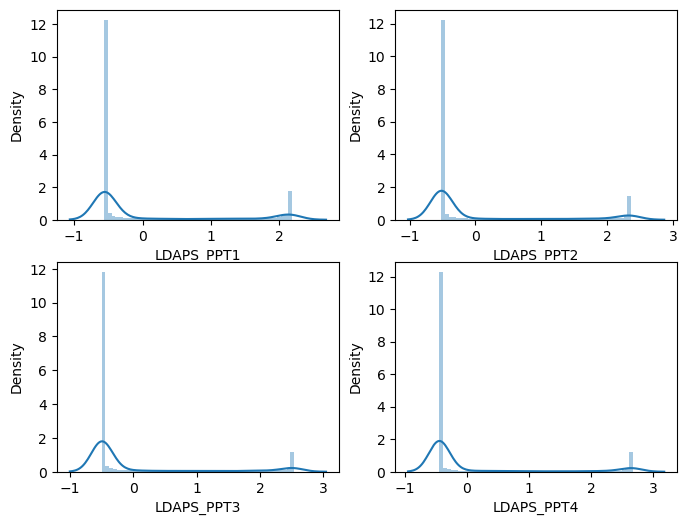

In [361]:
#Let uss their distribution as we have succesfully removed all the outliers by transforming the columns
plt.figure(figsize=(8,6))
plotnumber=1
for i in transformed:
    plt.subplot(2,2,plotnumber)
    sns.distplot(transformed[i])
    plotnumber+=1
plt.show()

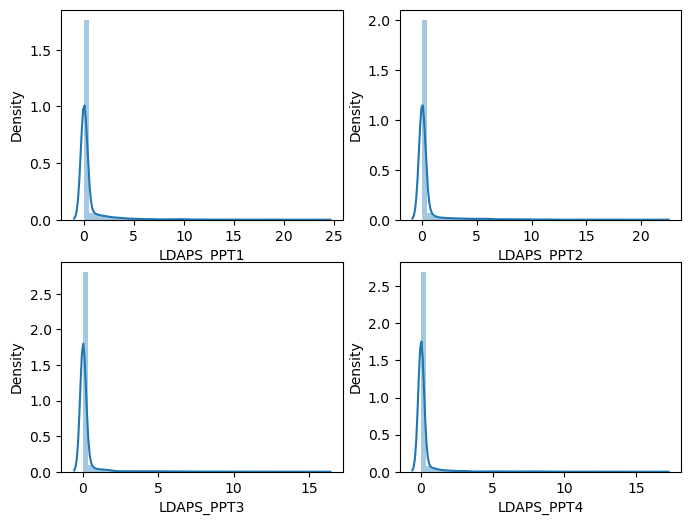

In [363]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in data[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

In [364]:
transformed.skew()

LDAPS_PPT1    1.438420
LDAPS_PPT2    1.628659
LDAPS_PPT3    1.795514
LDAPS_PPT4    2.028312
dtype: float64

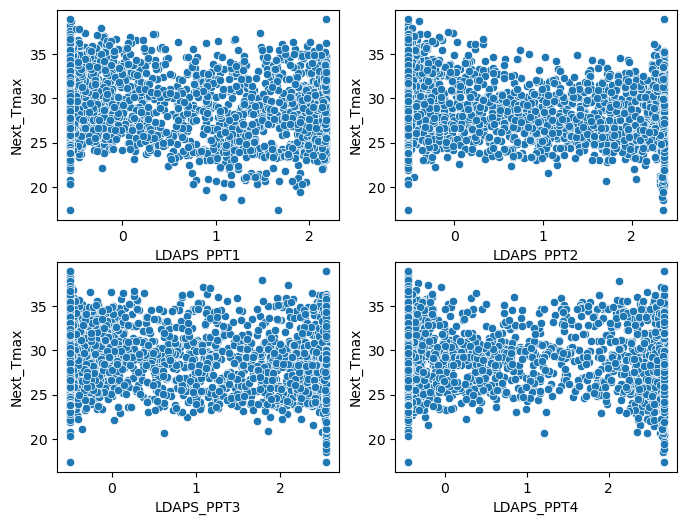

In [365]:
#So there is a very big difference in the skewness of the transformed columns after the tranformation 
#Let us see their relation with the columns now
plt.figure(figsize=(8,6))
plotnumber=1
for i in transformed:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=transformed[i],y=data['Next_Tmax'])
    plotnumber+=1
plt.show()

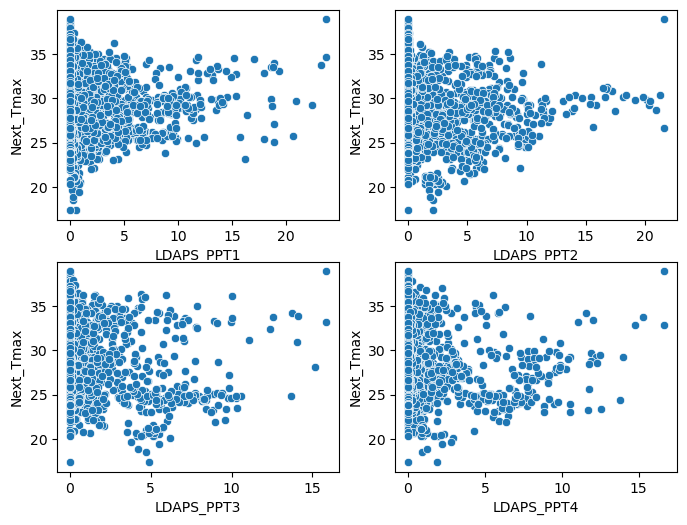

In [366]:
plt.figure(figsize=(8,6))
plotnumber=1
for i in transformed:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=data[i],y=data['Next_Tmax'])
    plotnumber+=1
plt.show()

In [371]:
#At first without the transformation the data was saturated at one point but after the transformation the case is not the same

In [372]:
#Let us see the correlation now after the transformation

In [374]:
concat_columns=['LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'Solar radiation','Next_Tmax', 'Next_Tmin']

In [377]:
corr=pd.concat([data[concat_columns],transformed],axis=1).corr()

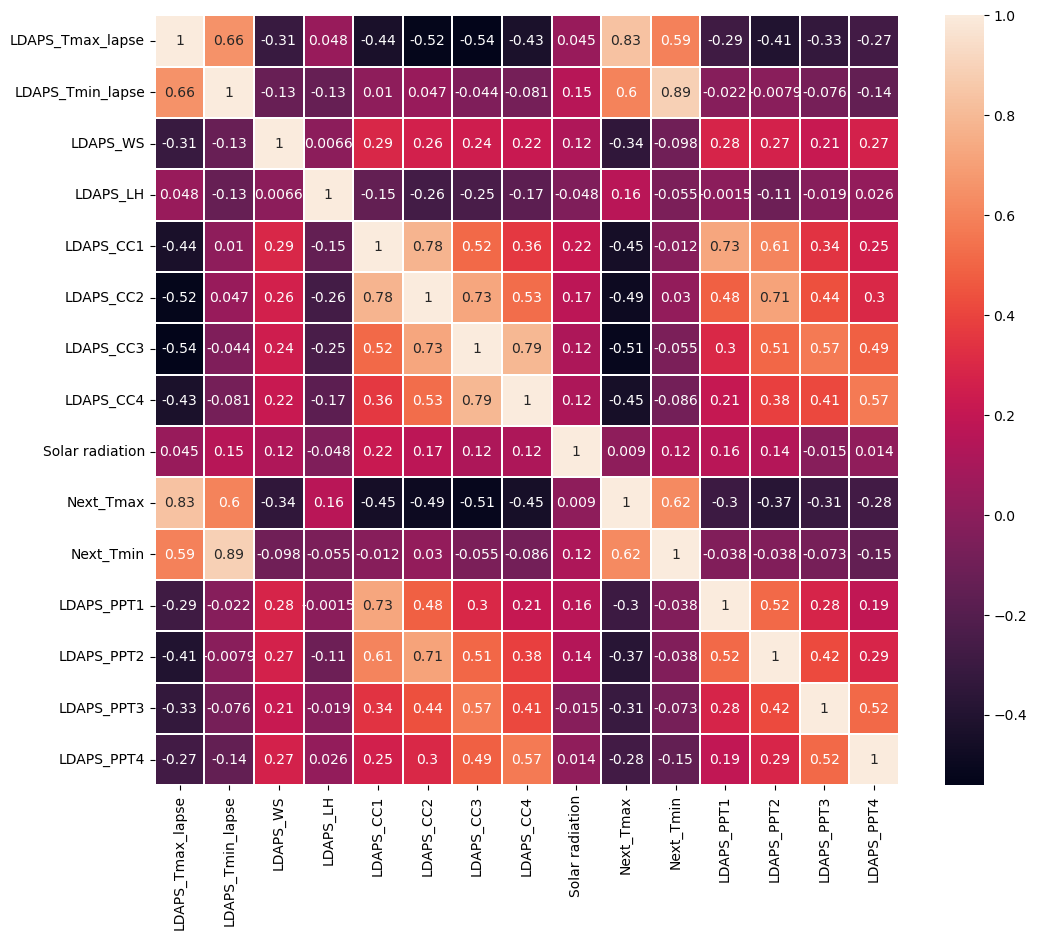

In [379]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,linewidths=0.1)
plt.show()

In [380]:
#So there is a bit change in the relation but there is nothing to worry  as such

In [381]:
data_notrans=data.copy()

In [384]:
#So let us just add the transformed columns to the dataframe
data=data.drop(columns=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'])
data

slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  \
0      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7747   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7748   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7749   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7750   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
7751   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   

      lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  \
0      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7747   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7748   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
7749   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
7750   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7751   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   

      lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  Day2  \
0      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
1      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
2      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
3      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
4      0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   0.0   
...    ...    ...    ...    ...    ...    ...     ...     ...   ...   ...   
7747   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7748   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7749   0.0    0.0    0.0    0.0    0.0    1.0     0.0     1.0   0.0   0.0   
7750   1.0    1.0    0.0    0.0    0.0    0.0     1.0     0.0   0.0   1.0   
7751   0.0    1.0    0.0    0.0    0.0    0.0     1.0     0.0   0.0   1.0   

      Day3  station1  station2  station3  station4  station5  Present_Tmax  \
0      1.0       1.0       0.0       0.0       0.0       0.0          28.7   
1      1.0       1.0       0.0       0.0       0.0       0.0          31.9   
2      1.0       1.0       0.0       0.0       0.0       0.0          31.6   
3      1.0       1.0       0.0       0.0       0.0       0.0          32.0   
4      1.0       1.0       0.0       0.0       0.0       0.0          31.4   
...    ...       ...       ...       ...       ...       ...           ...   
7747   1.0       0.0       0.0       0.0       0.0       1.0          23.3   
7748   1.0       0.0       0.0       0.0       0.0       1.0          23.3   
7749   1.0       0.0       0.0       0.0       0.0       1.0          23.2   
7750   0.0       0.0       0.0       1.0       0.0       0.0          20.0   
7751   0.0       0.0       0.0       1.0       0.0       0.0          37.6   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             21.4    58.255688    91.116364         28.074101   
1             21.6    52.263397    90.604721         29.850689   
2             23.3    48

In [385]:
data=pd.concat([transformed,data],axis=1)
data

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2      -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
...          ...         ...         ...         ...   ...   ...   ...   ...   
7747   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7748   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7749   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7750   -0.563751   -0.523808   -0.498384   -0.449868   1.0   0.0   0.0   0.0   
7751    2.182127    2.367124    2.541766    2.674810   0.0   0.0   0.0   0.0   

      slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7747   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7748   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7749   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7750   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7751   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

      lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
1      1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0   
4      0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
7747   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0    0.0   
7748   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   
7749   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   
7750   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    1.0    0.0   
7751   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0   

      year3  year4  year5  Month1  Month2  Day1  Day2  Day3  station1  \
0       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
1       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
2       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
3       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
4       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
...     ...    ...    ...     ...     ...   ...   ...   ...       ...   
7747    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7748    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7749    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7750    0.0    0.0    0.0     1.0     0.0   0.0   1.0   0.0       0.0   
7751    0.0    0.0    0.0     1.0     0.0   0.0   1.0   0.0       0.0   

      station2  station3  station4  station5  Present_Tmax  Present_Tmin  \
0          0.0       0.0       0.0       0.0          28.7          21.4   
1          0.0       0.0       0.0       0.0          31.9          21.6   
2          0.0       0.0       0.0       0.0          31.6        

In [386]:
data.head()

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   

   slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  year3  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
1   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
2   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0    0.0   
4   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   

   year4  year5  Month1  Month2  Day1  Day2  Day3  station1  station2  \
0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
1    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
2    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
3    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
4    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   

   station3  station4  station5  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0       0.0       0.0       0.0          28.7          21.4    58.255688   
1       0.0       0.0       0.0          31.9          21.6    52.263397   
2       0.0       0.0       0.0          31.6          23.3    48.690479   
3       0.0       0.0       0.0          32.0          23.4    58.239788   
4       0.0       0.0       0.0          31.4          21.9    56.174095   

   LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0    91.116364         28.074101         23.006936  6.818887   69.451805   
1    90.604721         29.850689         24.035009  5.691890   51.937448   
2    83.973587         30.091292         24.565633  6.138224   20.573050   
3    96.483688         29.704629         23.326177  5.650050   65.727144   
4    90.155128         29.113934         23.486480  5.735004  107.965535   

   LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  Solar radiation  Next_Tmax  \
0   0.233947   0.203896   0.161697   0.130928      5992.895996       29.1   
1   0.225508   0.251771   0.159444   0.127727      5869.312500       30.5   
2   0.209344   0.257469   0.204091   0.142125      5863.555664       31.1   
3   0.216372   0.226002   0.161157   0.134249      5856.964844       31.7   
4   0.151407   0.249995   0.178892   0.170021      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [390]:
data[continous_columns]

LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896   0.161697   0.130928   -0.563751   -0.523808   -0.498384   
1      0.251771   0.159444   0.127727   -0.563751   -0.523808   -0.498384   
2      0.257469   0.204091   0.142125   -0.563751   -0.523808   -0.498384   
3      0.226002   0.161157   0.134249   -0.563751   -0.523808   -0.498384   
4      0.249995   0.178892   0.170021   -0.563751   -0.523808   -0.498384   
...         ...        ...        ...         ...         ...         ...   
7747   0.081035   0.000000   0.000000   -0.563751   -0.523808   -0.498384   
7748   0.074962   0.000000   0.000000   -0.563751   -0.523808   -0.498384   
7749   0.059869   0.000000   0.000796   -0.563751   -0.523808   -0.498384   
7750   0.000000   0.000000   0.000000   -0.563751   -0.523808   -0.498384   
7751   0.968353   0.983789   0.974710    2.182127    2.367124    2.541766   

      LDAPS_PPT4  Solar radiation  
0      -0.449868      5992.895996  
1      -0.449868      5869.312500  
2      -0.449868      5863.555664  
3      -0.449868      5856.964844  
4      -0.449868      5859.552246  
...          ...              ...  
7747   -0.449868      4443.313965  
7748   -0.449868      4438.373535  
7749   -0.449868      4451.345215  
7750   -0.449868      4329.520508  
7751    2.674810      5992.895996  

[7752 rows x 13 columns]

In [395]:
#Now let us see the outliers of the continous columns
data[continous_columns].skew()

LDAPS_Tmax_lapse   -0.234344
LDAPS_Tmin_lapse   -0.586210
LDAPS_WS            1.577350
LDAPS_LH            0.670182
LDAPS_CC1           0.458230
LDAPS_CC2           0.469130
LDAPS_CC3           0.637398
LDAPS_CC4           0.663921
LDAPS_PPT1          1.438420
LDAPS_PPT2          1.628659
LDAPS_PPT3          1.795514
LDAPS_PPT4          2.028312
Solar radiation    -0.511210
dtype: float64

In [392]:
pd.set_option('display.max_rows',13)

In [398]:
#Now let us treat the outliers of the continous columns
index=np.where(np.abs(zscore(data[continous_columns]))>3)[0]

In [399]:
len(index)

235

In [401]:
#Now is is feasible to delete the outliers because there are only 235 and we will not losse much information also
index

array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
        494,  519,  544,  569,  575,  584,  594,  969, 1494, 1778, 1779,
       1781, 1791, 1794, 2175, 2176, 2177, 2178, 2179, 2179, 2180, 2181,
       2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191,
       2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2353, 2354, 2356,
       2369, 2375, 2378, 2394, 2441, 2528, 2544, 2569, 3104, 3116, 3375,
       3378, 3394, 3400, 3404, 3406, 3407, 3408, 3409, 3411, 3413, 3419,
       3441, 3454, 3466, 3475, 3478, 3479, 3481, 3482, 3484, 3486, 3488,
       3491, 3494, 3719, 3944, 3950, 3969, 4475, 4476, 4478, 4484, 4494,
       4744, 4750, 4769, 5025, 5044, 5606, 5981, 6075, 6078, 6081, 6084,
       6091, 6094, 6125, 6144, 6150, 6150, 6150, 6153, 6153, 6153, 6159,
       6161, 6169, 6169, 6169, 6175, 6175, 6175, 6176, 6176, 6176, 6177,
       6177, 6178, 6178, 6178, 6179, 6180, 6180, 6181, 6181, 6182, 6183,
       6183, 6183, 6184, 6184, 6184, 6186, 6186, 61

In [402]:
score=zscore(data[continous_columns])

In [404]:
score.iloc[7751]

LDAPS_Tmax_lapse    3.031181
LDAPS_Tmin_lapse    2.593538
LDAPS_WS            6.785961
LDAPS_LH            4.488833
LDAPS_CC1           2.288461
LDAPS_CC2           2.379243
LDAPS_CC3           2.666177
LDAPS_CC4           2.664990
LDAPS_PPT1          2.182127
LDAPS_PPT2          2.367124
LDAPS_PPT3          2.541766
LDAPS_PPT4          2.674810
Solar radiation     1.517935
Name: 7751, dtype: float64

In [406]:
data=data.drop(index=index)
data.reset_index(drop=True,inplace=True)
data

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2      -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
...          ...         ...         ...         ...   ...   ...   ...   ...   
7554   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
7555   -0.563751   -0.523808   -0.498384   -0.449868   1.0   0.0   0.0   0.0   
7556   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7557   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7558   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   

      slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7554   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7555   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7557   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7558   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

      lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
1      1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0   
4      0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
7554   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
7555   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    0.0    0.0   
7556   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0    0.0   
7557   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   
7558   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   

      year3  year4  year5  Month1  Month2  Day1  Day2  Day3  station1  \
0       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
1       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
2       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
3       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
4       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
...     ...    ...    ...     ...     ...   ...   ...   ...       ...   
7554    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7555    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7556    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7557    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7558    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   

      station2  station3  station4  station5  Present_Tmax  Present_Tmin  \
0          0.0       0.0       0.0       0.0          28.7          21.4   
1          0.0       0.0       0.0       0.0          31.9          21.6   
2          0.0       0.0       0.0       0.0          31.6        

#SO succesfully treated all the nulls 
Now we will proceed to the model building phase we have to make 2 model
The label also had outliers so we will divide into feature and label and will remove the outlier of one label which will be a feature column for the other label and when we will make model for the other label than we will treat the outlier of the second one which now will act as a feature columns for the second label

In [408]:
continous_columns.append('Next_Tmin') #First model will be for the max so the min will be a feature there

In [410]:
x=data.drop(columns='Next_Tmax')
y=data['Next_Tmax']
y=pd.DataFrame(y)
y

Next_Tmax
0          29.1
1          30.5
2          31.1
3          31.7
4          31.2
...         ...
7554       27.6
7555       28.0
7556       28.3
7557       28.6
7558       27.8

[7559 rows x 1 columns]

In [412]:
x.head()

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   

   slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  year3  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
1   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
2   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0    0.0   
4   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0   

   year4  year5  Month1  Month2  Day1  Day2  Day3  station1  station2  \
0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
1    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
2    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
3    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   
4    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0       0.0   

   station3  station4  station5  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0       0.0       0.0       0.0          28.7          21.4    58.255688   
1       0.0       0.0       0.0          31.9          21.6    52.263397   
2       0.0       0.0       0.0          31.6          23.3    48.690479   
3       0.0       0.0       0.0          32.0          23.4    58.239788   
4       0.0       0.0       0.0          31.4          21.9    56.174095   

   LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0    91.116364         28.074101         23.006936  6.818887   69.451805   
1    90.604721         29.850689         24.035009  5.691890   51.937448   
2    83.973587         30.091292         24.565633  6.138224   20.573050   
3    96.483688         29.704629         23.326177  5.650050   65.727144   
4    90.155128         29.113934         23.486480  5.735004  107.965535   

   LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  Solar radiation  Next_Tmin  
0   0.233947   0.203896   0.161697   0.130928      5992.895996       21.2  
1   0.225508   0.251771   0.159444   0.127727      5869.312500       22.5  
2   0.209344   0.257469   0.204091   0.142125      5863.555664       23.9  
3   0.216372   0.226002   0.161157   0.134249      5856.964844       24.3  
4   0.151407   0.249995   0.178892   0.170021      5859.552246       22.5

In [416]:
pd.set_option('display.max_rows',14)
x[continous_columns].skew()

LDAPS_Tmax_lapse   -0.109423
LDAPS_Tmin_lapse   -0.401783
LDAPS_WS            1.026190
LDAPS_LH            0.595201
LDAPS_CC1           0.485401
LDAPS_CC2           0.473234
LDAPS_CC3           0.632195
LDAPS_CC4           0.667795
LDAPS_PPT1          1.479777
LDAPS_PPT2          1.671584
LDAPS_PPT3          1.840685
LDAPS_PPT4          2.087083
Solar radiation    -0.506268
Next_Tmin          -0.303142
dtype: float64

So the skewness has been removed from the data columns now let us see the correlation after that we will proceed to the model building phase

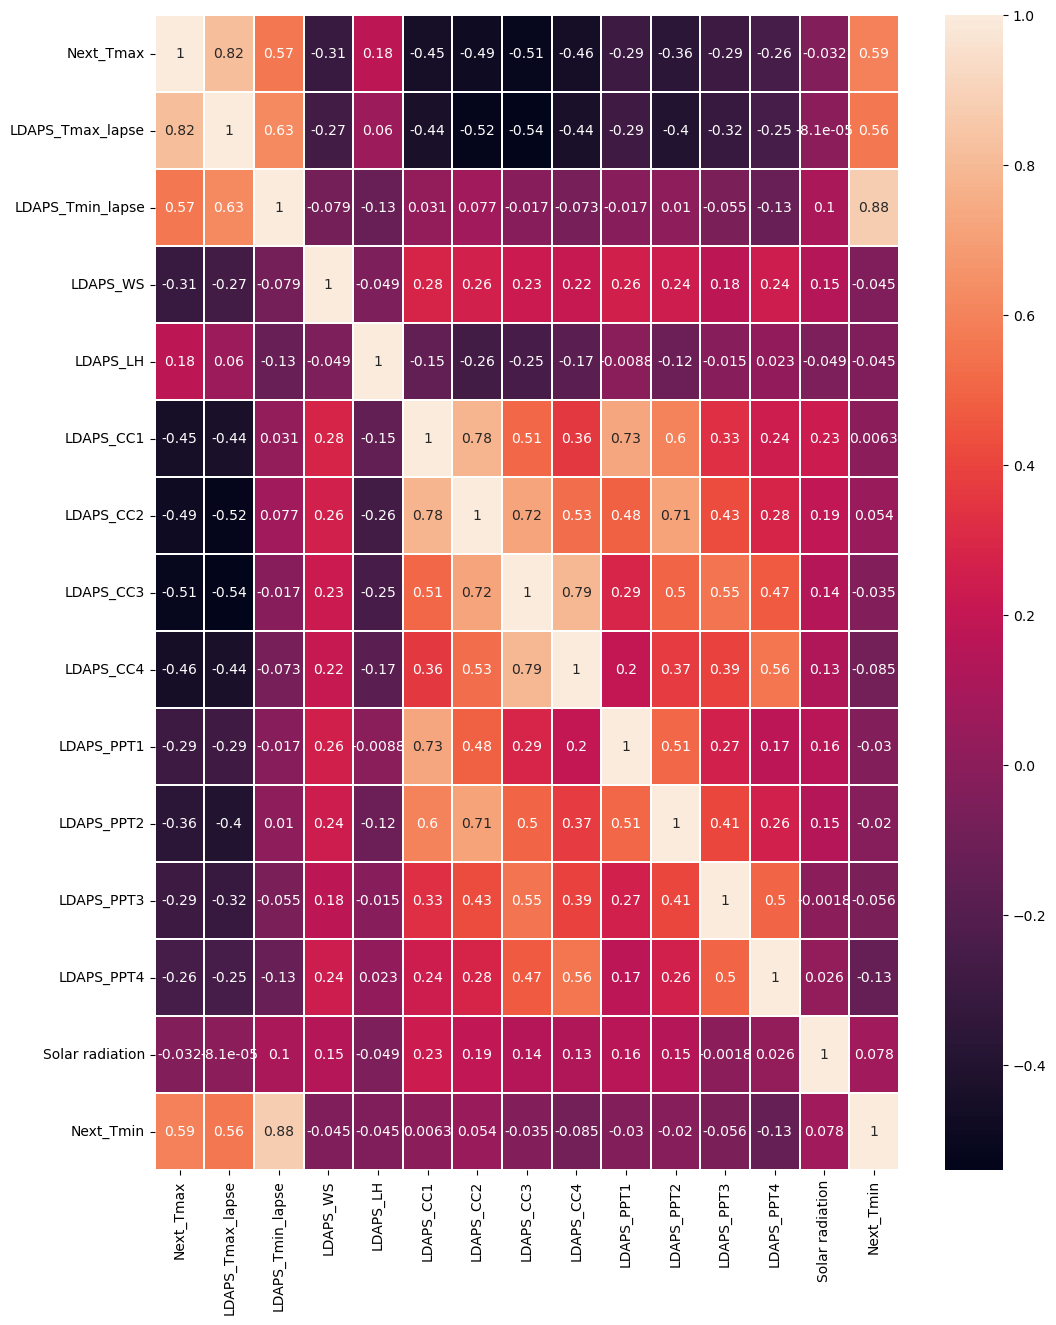

In [421]:
corr=pd.concat([y,x[continous_columns]],axis=1).corr()
plt.figure(figsize=(12,15))
sns.heatmap(corr,annot=True,linewidths=0.1)
plt.show()

This is good there is not much correlation seen between the feature columns
The rest we will analyse in the variance inlfation factor

In [422]:
x

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2      -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
...          ...         ...         ...         ...   ...   ...   ...   ...   
7554   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
7555   -0.563751   -0.523808   -0.498384   -0.449868   1.0   0.0   0.0   0.0   
7556   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7557   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7558   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   

      slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7554   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7555   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7557   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7558   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

      lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
1      1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0   
4      0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
7554   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
7555   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    0.0    0.0   
7556   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0    0.0   
7557   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   
7558   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   

      year3  year4  year5  Month1  Month2  Day1  Day2  Day3  station1  \
0       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
1       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
2       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
3       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
4       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
...     ...    ...    ...     ...     ...   ...   ...   ...       ...   
7554    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7555    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7556    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7557    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7558    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   

      station2  station3  station4  station5  Present_Tmax  Present_Tmin  \
0          0.0       0.0       0.0       0.0          28.7          21.4   
1          0.0       0.0       0.0       0.0          31.9          21.6   
2          0.0       0.0       0.0       0.0          31.6        

In [427]:
#Let us divide the dataset into features and label after that which we will proceed to the model building

In [430]:
x=data.drop(columns='Next_Tmax')
y=data['Next_Tmax']

In [432]:
x.columns

Index(['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'slo1', 'slo2',
       'slo3', 'slo4', 'slo5', 'slo6', 'DEM1', 'DEM2', 'DEM3', 'DEM4', 'DEM5',
       'DEM6', 'lon1', 'lon2', 'lon3', 'lon4', 'lon5', 'lon6', 'lat1', 'lat2',
       'lat3', 'lat4', 'lat5', 'lat6', 'lat7', 'year1', 'year2', 'year3',
       'year4', 'year5', 'Month1', 'Month2', 'Day1', 'Day2', 'Day3',
       'station1', 'station2', 'station3', 'station4', 'station5',
       'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'Solar radiation',
       'Next_Tmin'],
      dtype='object')

In [434]:
continous_columns=['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'Solar radiation',
       'Next_Tmin']

In [436]:
len(continous_columns)

18

In [437]:
x[continous_columns]

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0      -0.563751   -0.523808   -0.498384   -0.449868          28.7   
1      -0.563751   -0.523808   -0.498384   -0.449868          31.9   
2      -0.563751   -0.523808   -0.498384   -0.449868          31.6   
3      -0.563751   -0.523808   -0.498384   -0.449868          32.0   
4      -0.563751   -0.523808   -0.498384   -0.449868          31.4   
...          ...         ...         ...         ...           ...   
7554   -0.563751   -0.523808   -0.498384   -0.449868          23.1   
7555   -0.563751   -0.523808   -0.498384   -0.449868          22.5   
7556   -0.563751   -0.523808   -0.498384   -0.449868          23.3   
7557   -0.563751   -0.523808   -0.498384   -0.449868          23.3   
7558   -0.563751   -0.523808   -0.498384   -0.449868          23.2   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             21.4    58.255688    91.116364         28.074101   
1             21.6    52.263397    90.604721         29.850689   
2             23.3    48.690479    83.973587         30.091292   
3             23.4    58.239788    96.483688         29.704629   
4             21.9    56.174095    90.155128         29.113934   
...            ...          ...          ...               ...   
7554          17.8    24.688997    78.261383         27.812697   
7555          17.4    30.094858    83.690018         26.704905   
7556          17.1    26.741310    78.869858         26.352081   
7557          17.7    24.040634    77.294975         27.010193   
7558          17.4    22.933014    77.243744         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  \
0            23.006936  6.818887   69.451805   0.233947   0.203896   
1            24.035009  5.691890   51.937448   0.225508   0.251771   
2            24.565633  6.138224   20.573050   0.209344   0.257469   
3            23.326177  5.650050   65.727144   0.216372   0.226002   
4            23.486480  5.735004  107.965535   0.151407   0.249995   
...                ...       ...         ...        ...        ...   
7554         18.303014  6.603253    9.614074   0.052902   0.030169   
7555         17.814038  5.768083   82.146707   0.066461   0.024518   
7556         18.775678  6.148918   72.058294   0.030034   0.081035   
7557         18.733519  6.542819   47.241457   0.035874   0.074962   
7558         18.522965  7.289264    9.090034   0.048954   0.059869   

         LDAPS_CC3  LDAPS_CC4  Solar radiation  Next_Tmin  
0     1.616969e-01   0.130928      5992.895996       21.2  
1     1.594441e-01   0.127727      5869.312500       22.5  
2     2.040915e-01   0.142125      5863.555664       23.9  
3     1.611574e-01   0.134249      5856.964844       24.3  
4     1.788925e-01   0.170021      5859.552246       22.5  
...            ...        ...              ...        ...  
7554  0.000000e+00   0.004380      4456.024414       17.7  
7555  5.850000e-07   0.017678      4441.803711       17.1  
7556  0.000000e+00   0.000000      4443.313965       18.1  
7557  0.000000e+00   0.000000      4438.373535       18.8  
7558  0.000000e+00   0.000796      4451.345215       17.4  

[7559 rows x 18 columns]

In [438]:
#let us standardize it and see the variance after that we will add the standardize to main feature column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
continous_columns_scaled=scaler.fit_transform(x[continous_columns])
continous_columns_scaled=pd.DataFrame(continous_columns_scaled,columns=continous_columns)
continous_columns_scaled

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0       -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1       -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2       -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3       -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4       -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...          ...         ...         ...         ...           ...   
7554    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.799395     0.113174     0.389900         -0.587579   
1        -0.714439    -0.301996     0.318027          0.040747   
2         0.007692    -0.549541    -0.613479          0.125841   
3         0.050170     0.112072     1.143873         -0.010910   
4        -0.587004    -0.031047     0.254871         -0.219821   
...            ...          ...          ...               ...   
7554     -2.328612    -2.212458    -1.415898         -0.680030   
7555     -2.498525    -1.837919    -0.653313         -1.071823   
7556     -2.625959    -2.070266    -1.330423         -1.196606   
7557     -2.371090    -2.257379    -1.551654         -0.963851   
7558     -2.498525    -2.334119    -1.558851         -0.635178   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.275624 -0.072467  0.233766  -0.503019  -0.585764  -0.624400   
1             0.184797 -0.670311 -0.300951  -0.535383  -0.398206  -0.633557   
2             0.422437 -0.433542 -1.258513  -0.597373  -0.375883  -0.452064   
3            -0.132652 -0.692505  0.120051  -0.570420  -0.499159  -0.626593   
4            -0.060861 -0.647439  1.409598  -0.819557  -0.405164  -0.554499   
...                ...       ...       ...        ...        ...        ...   
7554         -2.382268 -0.186855 -1.593092  -1.197317  -1.266358  -1.281705   
7555         -2.601255 -0.629892  0.621344  -1.145319  -1.288494  -1.281703   
7556         -2.170586 -0.427869  0.313343  -1.285014  -1.067084  -1.281705   
7557         -2.189467 -0.218914 -0.444321  -1.262619  -1.090874  -1.281705   
7558         -2.283763  0.177057 -1.609092  -1.212460  -1.150006  -1.281705   

      LDAPS_CC4  Solar radiation  Next_Tmin  
0     -0.664670         1.526949  -0.757810  
1     -0.677410         1.235023  -0.214771  
2     -0.620104         1.221424   0.370041  
3     -0.651454         1.205855   0.537129  
4     -0.509075         1.211967  -0.214771  
...         ...              ...        ...  
7554  -1.168350        -2.103414  -2.219839  
7555  -1.115423        -2.137006  -2.470472  
7556  -1.185783        -2.133439  -2.052750  
7557  -1.185783        -2.145109  -1.760344  
7558  -1.182614        -2.114468  -2.345155  

[7559 rows x 18 columns]

In [439]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [440]:
for i in range(18):
    print(variance_inflation_factor(continous_columns_scaled,i))
    print(continous_columns[i])
    print('               ')

2.5403742251248924
LDAPS_PPT1
               
2.318138286646936
LDAPS_PPT2
               
1.8181947158319234
LDAPS_PPT3
               
1.8426346356117334
LDAPS_PPT4
               
2.7763090490233493
Present_Tmax
               
3.3021810122086044
Present_Tmin
               
6.271165909902444
LDAPS_RHmin
               
2.1941235972307287
LDAPS_RHmax
               
7.019837947788451
LDAPS_Tmax_lapse
               
8.409095109860086
LDAPS_Tmin_lapse
               
1.2112292082461589
LDAPS_WS
               
1.5088367221252095
LDAPS_LH
               
5.006685266418434
LDAPS_CC1
               
5.985176485298084
LDAPS_CC2
               
5.552902536480859
LDAPS_CC3
               
3.3196196063325023
LDAPS_CC4
               
1.231576017747536
Solar radiation
               
5.493224783210601
Next_Tmin
               


In [445]:
#SO the variance is in a good range and we will now do not delete any columns
#Let us add this to the main feature columns after that we can make the mode
x=x.drop(columns=continous_columns)
x=pd.concat([continous_columns_scaled,x],axis=1)
x.head()

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  Present_Tmin  \
0    -0.55461   -0.515383   -0.491717   -0.442465     -0.388042     -0.799395   
1    -0.55461   -0.515383   -0.491717   -0.442465      0.713607     -0.714439   
2    -0.55461   -0.515383   -0.491717   -0.442465      0.610327      0.007692   
3    -0.55461   -0.515383   -0.491717   -0.442465      0.748033      0.050170   
4    -0.55461   -0.515383   -0.491717   -0.442465      0.541474     -0.587004   

   LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
0     0.113174     0.389900         -0.587579         -0.275624 -0.072467   
1    -0.301996     0.318027          0.040747          0.184797 -0.670311   
2    -0.549541    -0.613479          0.125841          0.422437 -0.433542   
3     0.112072     1.143873         -0.010910         -0.132652 -0.692505   
4    -0.031047     0.254871         -0.219821         -0.060861 -0.647439   

   LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  Solar radiation  \
0  0.233766  -0.503019  -0.585764  -0.624400  -0.664670         1.526949   
1 -0.300951  -0.535383  -0.398206  -0.633557  -0.677410         1.235023   
2 -1.258513  -0.597373  -0.375883  -0.452064  -0.620104         1.221424   
3  0.120051  -0.570420  -0.499159  -0.626593  -0.651454         1.205855   
4  1.409598  -0.819557  -0.405164  -0.554499  -0.509075         1.211967   

   Next_Tmin  slo1  slo2  slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  \
0  -0.757810   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1  -0.214771   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
2   0.370041   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3   0.537129   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   
4  -0.214771   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

   DEM5  DEM6  lon1  lon2  lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  \
0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   

   lat5  lat6  lat7  year1  year2  year3  year4  year5  Month1  Month2  Day1  \
0   0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   
1   0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   
2   0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   
3   0.0   1.0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   
4   0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0     0.0     1.0   0.0   

   Day2  Day3  station1  station2  station3  station4  station5  
0   0.0   1.0       1.0       0.0       0.0       0.0       0.0  
1   0.0   1.0       1.0       0.0       0.0       0.0       0.0  
2   0.0   1.0       1.0       0.0       0.0       0.0       0.0  
3   0.0   1.0       1.0       0.0       0.0       0.0       0.0  
4   0.0   1.0       1.0       0.0       0.0       0.0       0.0

In [446]:
x

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0       -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1       -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2       -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3       -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4       -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...          ...         ...         ...         ...           ...   
7554    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.799395     0.113174     0.389900         -0.587579   
1        -0.714439    -0.301996     0.318027          0.040747   
2         0.007692    -0.549541    -0.613479          0.125841   
3         0.050170     0.112072     1.143873         -0.010910   
4        -0.587004    -0.031047     0.254871         -0.219821   
...            ...          ...          ...               ...   
7554     -2.328612    -2.212458    -1.415898         -0.680030   
7555     -2.498525    -1.837919    -0.653313         -1.071823   
7556     -2.625959    -2.070266    -1.330423         -1.196606   
7557     -2.371090    -2.257379    -1.551654         -0.963851   
7558     -2.498525    -2.334119    -1.558851         -0.635178   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.275624 -0.072467  0.233766  -0.503019  -0.585764  -0.624400   
1             0.184797 -0.670311 -0.300951  -0.535383  -0.398206  -0.633557   
2             0.422437 -0.433542 -1.258513  -0.597373  -0.375883  -0.452064   
3            -0.132652 -0.692505  0.120051  -0.570420  -0.499159  -0.626593   
4            -0.060861 -0.647439  1.409598  -0.819557  -0.405164  -0.554499   
...                ...       ...       ...        ...        ...        ...   
7554         -2.382268 -0.186855 -1.593092  -1.197317  -1.266358  -1.281705   
7555         -2.601255 -0.629892  0.621344  -1.145319  -1.288494  -1.281703   
7556         -2.170586 -0.427869  0.313343  -1.285014  -1.067084  -1.281705   
7557         -2.189467 -0.218914 -0.444321  -1.262619  -1.090874  -1.281705   
7558         -2.283763  0.177057 -1.609092  -1.212460  -1.150006  -1.281705   

      LDAPS_CC4  Solar radiation  Next_Tmin  slo1  slo2  slo3  slo4  slo5  \
0     -0.664670         1.526949  -0.757810   0.0   0.0   0.0   0.0   0.0   
1     -0.677410         1.235023  -0.214771   0.0   0.0   1.0   0.0   0.0   
2     -0.620104         1.221424   0.370041   0.0   1.0   0.0   0.0   0.0   
3     -0.651454         1.205855   0.537129   0.0   0.0   0.0   0.0   0.0   
4     -0.509075         1.211967  -0.214771   0.0   0.0   1.0   0.0   0.0   
...         ...              ...        ...   ...   ...   ...   ...   ...   
7554  -1.168350        -2.103414  -2.219839   0.0   0.0   1.0   0.0   0.0   
7555  -1.115423        -2.137006  -2.470472   1.0   0.0   0.0   0.0   0.0   
7556  -1.185783        -2.133439  -2.052750   0.0   1.0   0.0   0.0   0.0   
7557  -1.185783        -2.145109  -1.760344   0.0   1.0   0.0   0.0   0.0   
7558  -1.182614        -2.114468  -2.345155   0.0   1.0   0.0   0.0   0.0   

      slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  lon5  \
0      1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
1      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
2      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3      1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...  

In [ ]:
#So we have succesfully added the scaled columns to the main feature columns now we can make the model 

In [447]:
x.columns

Index(['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Present_Tmax',
       'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse',
       'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2',
       'LDAPS_CC3', 'LDAPS_CC4', 'Solar radiation', 'Next_Tmin', 'slo1',
       'slo2', 'slo3', 'slo4', 'slo5', 'slo6', 'DEM1', 'DEM2', 'DEM3', 'DEM4',
       'DEM5', 'DEM6', 'lon1', 'lon2', 'lon3', 'lon4', 'lon5', 'lon6', 'lat1',
       'lat2', 'lat3', 'lat4', 'lat5', 'lat6', 'lat7', 'year1', 'year2',
       'year3', 'year4', 'year5', 'Month1', 'Month2', 'Day1', 'Day2', 'Day3',
       'station1', 'station2', 'station3', 'station4', 'station5'],
      dtype='object')

In [448]:
x.shape

(7559, 58)

#Because of the one hot encoding the feature columns have increased but that was also necessary. Now let us make the model
for the first label which is the next tmax

In [450]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score    

#The linear regression is a very good and fast model for the regression purpose so we will use it to know the best random state of the train test split. Other model will take a very long time which is not feasible at all

In [463]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8080934470098289 108


In [454]:
#SO we are getting a good accuracy on the simple linear regreesion also so now let us test with other model also

In [464]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [465]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
ds=DecisionTreeRegressor()

In [466]:
models=[rr,er,lr,gb,ad,bg,ri,ls,ds] #These are the different models which will be tested and the best one will be kept

In [467]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.904388348529401,
 ExtraTreesRegressor(): 0.9312310677892518,
 LinearRegression(): 0.8080934470098289,
 GradientBoostingRegressor(): 0.8549777047365508,
 AdaBoostRegressor(): 0.7626049583664429,
 BaggingRegressor(): 0.8876373186465814,
 Ridge(): 0.8079358536635596,
 LassoCV(): 0.8073899552640558,
 DecisionTreeRegressor(): 0.7885022286824592}

In [468]:
#Great the tree extratree and the random forest are performing well let us see what happens after cross validation

In [471]:
from sklearn.model_selection import cross_val_score
for model in models:
    print(model,',',cross_val_score(model,x,y,cv=5).mean())

RandomForestRegressor() , 0.6864252858696297
ExtraTreesRegressor() , 0.6936487056604778
LinearRegression() , -1.7203316048071722e+24
GradientBoostingRegressor() , 0.7033831195399367
AdaBoostRegressor() , 0.6497938013241227
BaggingRegressor() , 0.6552574733407102
Ridge() , 0.6773889691536902
LassoCV() , 0.7037129549267357
DecisionTreeRegressor() , 0.4085831682724376


In [ ]:
#We will do the tuning for the extratree regressor and the graint boost . They have been the best performing

In [474]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [475]:
model_extra_tree=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                                    min_samples_split=2,n_estimators=100)

In [480]:
model_extra_tree.fit(x_train,y_train)
pred=model_extra_tree.predict(x_test)
r2_score(y_test,pred)

0.9309929073851712

In [481]:
#the model extra tree is having an accuracy of 0.93 aftet the tuning which is quite good
#Let us do the tuning of the gradeint boost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create a GradientBoostingRegressor instance
gradient_boost = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(gradient_boost, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 80}


In [482]:
model_gradient=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,max_features='sqrt',min_samples_leaf=2,
                                        min_samples_split=5,n_estimators=80)

In [484]:
model_gradient.fit(x_train,y_train)
pred=model_gradient.predict(x_test)
r2_score(y_test,pred)

0.8819903041127273

In [485]:
r2_score(y_train,model_gradient.predict(x_train))

0.9130981457720113

#So this model is not overfitted and the tuning has increased the accuracy of this model
one thing to be noted is that we did not considered the variance in making this model so now we will also see the variance and will select features accordingy

In [488]:
continous_columns_scaled

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0       -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1       -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2       -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3       -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4       -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...          ...         ...         ...         ...           ...   
7554    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.799395     0.113174     0.389900         -0.587579   
1        -0.714439    -0.301996     0.318027          0.040747   
2         0.007692    -0.549541    -0.613479          0.125841   
3         0.050170     0.112072     1.143873         -0.010910   
4        -0.587004    -0.031047     0.254871         -0.219821   
...            ...          ...          ...               ...   
7554     -2.328612    -2.212458    -1.415898         -0.680030   
7555     -2.498525    -1.837919    -0.653313         -1.071823   
7556     -2.625959    -2.070266    -1.330423         -1.196606   
7557     -2.371090    -2.257379    -1.551654         -0.963851   
7558     -2.498525    -2.334119    -1.558851         -0.635178   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.275624 -0.072467  0.233766  -0.503019  -0.585764  -0.624400   
1             0.184797 -0.670311 -0.300951  -0.535383  -0.398206  -0.633557   
2             0.422437 -0.433542 -1.258513  -0.597373  -0.375883  -0.452064   
3            -0.132652 -0.692505  0.120051  -0.570420  -0.499159  -0.626593   
4            -0.060861 -0.647439  1.409598  -0.819557  -0.405164  -0.554499   
...                ...       ...       ...        ...        ...        ...   
7554         -2.382268 -0.186855 -1.593092  -1.197317  -1.266358  -1.281705   
7555         -2.601255 -0.629892  0.621344  -1.145319  -1.288494  -1.281703   
7556         -2.170586 -0.427869  0.313343  -1.285014  -1.067084  -1.281705   
7557         -2.189467 -0.218914 -0.444321  -1.262619  -1.090874  -1.281705   
7558         -2.283763  0.177057 -1.609092  -1.212460  -1.150006  -1.281705   

      LDAPS_CC4  Solar radiation  Next_Tmin  
0     -0.664670         1.526949  -0.757810  
1     -0.677410         1.235023  -0.214771  
2     -0.620104         1.221424   0.370041  
3     -0.651454         1.205855   0.537129  
4     -0.509075         1.211967  -0.214771  
...         ...              ...        ...  
7554  -1.168350        -2.103414  -2.219839  
7555  -1.115423        -2.137006  -2.470472  
7556  -1.185783        -2.133439  -2.052750  
7557  -1.185783        -2.145109  -1.760344  
7558  -1.182614        -2.114468  -2.345155  

[7559 rows x 18 columns]

In [491]:
for i in range(18):
    print(variance_inflation_factor(continous_columns_scaled,i))
    print(continous_columns[i])
    print('           ')

2.5403742251248924
LDAPS_PPT1
           
2.318138286646936
LDAPS_PPT2
           
1.8181947158319234
LDAPS_PPT3
           
1.8426346356117334
LDAPS_PPT4
           
2.7763090490233493
Present_Tmax
           
3.3021810122086044
Present_Tmin
           
6.271165909902444
LDAPS_RHmin
           
2.1941235972307287
LDAPS_RHmax
           
7.019837947788451
LDAPS_Tmax_lapse
           
8.409095109860086
LDAPS_Tmin_lapse
           
1.2112292082461589
LDAPS_WS
           
1.5088367221252095
LDAPS_LH
           
5.006685266418434
LDAPS_CC1
           
5.985176485298084
LDAPS_CC2
           
5.552902536480859
LDAPS_CC3
           
3.3196196063325023
LDAPS_CC4
           
1.231576017747536
Solar radiation
           
5.493224783210601
Next_Tmin
           


In [492]:
#The min and max lapse are the ones with the highest scores so let us delete them and see the variance now
continous_columns_scaled=continous_columns_scaled.drop(columns=['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'])

In [493]:
continous_columns_scaled

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0       -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1       -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2       -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3       -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4       -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...          ...         ...         ...         ...           ...   
7554    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0        -0.799395     0.113174     0.389900 -0.072467  0.233766  -0.503019   
1        -0.714439    -0.301996     0.318027 -0.670311 -0.300951  -0.535383   
2         0.007692    -0.549541    -0.613479 -0.433542 -1.258513  -0.597373   
3         0.050170     0.112072     1.143873 -0.692505  0.120051  -0.570420   
4        -0.587004    -0.031047     0.254871 -0.647439  1.409598  -0.819557   
...            ...          ...          ...       ...       ...        ...   
7554     -2.328612    -2.212458    -1.415898 -0.186855 -1.593092  -1.197317   
7555     -2.498525    -1.837919    -0.653313 -0.629892  0.621344  -1.145319   
7556     -2.625959    -2.070266    -1.330423 -0.427869  0.313343  -1.285014   
7557     -2.371090    -2.257379    -1.551654 -0.218914 -0.444321  -1.262619   
7558     -2.498525    -2.334119    -1.558851  0.177057 -1.609092  -1.212460   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  Solar radiation  Next_Tmin  
0     -0.585764  -0.624400  -0.664670         1.526949  -0.757810  
1     -0.398206  -0.633557  -0.677410         1.235023  -0.214771  
2     -0.375883  -0.452064  -0.620104         1.221424   0.370041  
3     -0.499159  -0.626593  -0.651454         1.205855   0.537129  
4     -0.405164  -0.554499  -0.509075         1.211967  -0.214771  
...         ...        ...        ...              ...        ...  
7554  -1.266358  -1.281705  -1.168350        -2.103414  -2.219839  
7555  -1.288494  -1.281703  -1.115423        -2.137006  -2.470472  
7556  -1.067084  -1.281705  -1.185783        -2.133439  -2.052750  
7557  -1.090874  -1.281705  -1.185783        -2.145109  -1.760344  
7558  -1.150006  -1.281705  -1.182614        -2.114468  -2.345155  

[7559 rows x 16 columns]

In [495]:
continous_columns.remove('LDAPS_Tmin_lapse')

In [496]:
for i in range(16):
    print(variance_inflation_factor(continous_columns_scaled,i))
    print(continous_columns[i])
    print('            ')

2.510428642377484
LDAPS_PPT1
            
2.3140928886000944
LDAPS_PPT2
            
1.8074752581708193
LDAPS_PPT3
            
1.814228980318354
LDAPS_PPT4
            
2.6316141852695356
Present_Tmax
            
3.18624062528404
Present_Tmin
            
3.9748285222167037
LDAPS_RHmin
            
2.1560450374531195
LDAPS_RHmax
            
1.1747593227308477
LDAPS_WS
            
1.4300457084099132
LDAPS_LH
            
4.91254081095346
LDAPS_CC1
            
5.873960078135931
LDAPS_CC2
            
5.470014043515553
LDAPS_CC3
            
3.316838265464077
LDAPS_CC4
            
1.1337221155618076
Solar radiation
            
3.252975301985556
Next_Tmin
            


In [ ]:
#Now we have removed the variance now let us make new model with low variance feature columns

In [499]:
x=x.drop(columns=['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'])
x #We have dropped these two columns from the main feature column also now let us see the model accuracy now

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0       -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1       -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2       -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3       -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4       -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...          ...         ...         ...         ...           ...   
7554    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0        -0.799395     0.113174     0.389900 -0.072467  0.233766  -0.503019   
1        -0.714439    -0.301996     0.318027 -0.670311 -0.300951  -0.535383   
2         0.007692    -0.549541    -0.613479 -0.433542 -1.258513  -0.597373   
3         0.050170     0.112072     1.143873 -0.692505  0.120051  -0.570420   
4        -0.587004    -0.031047     0.254871 -0.647439  1.409598  -0.819557   
...            ...          ...          ...       ...       ...        ...   
7554     -2.328612    -2.212458    -1.415898 -0.186855 -1.593092  -1.197317   
7555     -2.498525    -1.837919    -0.653313 -0.629892  0.621344  -1.145319   
7556     -2.625959    -2.070266    -1.330423 -0.427869  0.313343  -1.285014   
7557     -2.371090    -2.257379    -1.551654 -0.218914 -0.444321  -1.262619   
7558     -2.498525    -2.334119    -1.558851  0.177057 -1.609092  -1.212460   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  Solar radiation  Next_Tmin  slo1  slo2  \
0     -0.585764  -0.624400  -0.664670         1.526949  -0.757810   0.0   0.0   
1     -0.398206  -0.633557  -0.677410         1.235023  -0.214771   0.0   0.0   
2     -0.375883  -0.452064  -0.620104         1.221424   0.370041   0.0   1.0   
3     -0.499159  -0.626593  -0.651454         1.205855   0.537129   0.0   0.0   
4     -0.405164  -0.554499  -0.509075         1.211967  -0.214771   0.0   0.0   
...         ...        ...        ...              ...        ...   ...   ...   
7554  -1.266358  -1.281705  -1.168350        -2.103414  -2.219839   0.0   0.0   
7555  -1.288494  -1.281703  -1.115423        -2.137006  -2.470472   1.0   0.0   
7556  -1.067084  -1.281705  -1.185783        -2.133439  -2.052750   0.0   1.0   
7557  -1.090874  -1.281705  -1.185783        -2.145109  -1.760344   0.0   1.0   
7558  -1.150006  -1.281705  -1.182614        -2.114468  -2.345155   0.0   1.0   

      slo3  slo4  slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  \
0      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1      1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
4      1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7554   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7555   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7557   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7558   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      lon3  lon4  lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  \
0      1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0   
1      0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0   
2      0.0   0.0   1.0   0.0   1.0   0.

In [502]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.7664981450009374 171


In [504]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [505]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9038140042031253,
 ExtraTreesRegressor(): 0.9329811324645227,
 LinearRegression(): 0.7664981450009374,
 GradientBoostingRegressor(): 0.8339647277627714,
 AdaBoostRegressor(): 0.726082691303676,
 BaggingRegressor(): 0.8861403591873112,
 Ridge(): 0.7653681353015608,
 LassoCV(): 0.7637926167486938,
 DecisionTreeRegressor(): 0.7543526127334506}

In [507]:
#There has been a increase in the score of the random forest and the extra tree so let us cross validate them
for model in models:
    print(model,',',cross_val_score(model,x,y,cv=5).mean())

RandomForestRegressor() , 0.5732609039441389
ExtraTreesRegressor() , 0.5873958501873691
LinearRegression() , -3.2427794190589505e+24
GradientBoostingRegressor() , 0.617468038773701
AdaBoostRegressor() , 0.5626674707354828
BaggingRegressor() , 0.5443583172638755
Ridge() , 0.5965622667286734
LassoCV() , 0.6544133426619224
DecisionTreeRegressor() , 0.2606772745134379


In [ ]:
#We will do the tuning for the best model with highest cross validation score

In [509]:
#Let us do the cross validation of the extra tree
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [510]:
model_extra_tree_variance=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                                             min_samples_split=2,n_estimators=100)

In [512]:
model_extra_tree_variance.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [513]:
pred=model_extra_tree_variance.predict(x_test)
r2_score(y_test,pred)

0.8999727796610342

In [514]:
r2_score(y_train,model_extra_tree_variance.predict(x_train))

0.9999995042820155

In [ ]:
#So this is also having an accuracy of 0.899 but the model with all feature columns was the best 
#Let us also do the tuning of the gradient boost


In [516]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create a GradientBoostingRegressor instance
gradient_boost = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(gradient_boost, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [517]:
model_gradient_variance=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,max_features='sqrt',min_samples_leaf=1,
                                                 min_samples_split=5,n_estimators=100)

In [518]:
model_gradient_variance.fit(x_train,y_train)
pred=model_gradient_variance.predict(x_test)
r2_score(y_test,pred)

0.8733145390854165

In [519]:
r2_score(y_train,model_gradient_variance.predict(x_train))

0.9170407991100527

In [524]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()

In [525]:
lassocv.fit(x_train,y_train)

LassoCV()

In [527]:
lassocv.alpha_ #this is the best alpha which we will use in the lasso model

0.0017778745236908483

In [528]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


param_grid = {
    'precompute': [True, False],
    'copy_X': [True, False],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.001, 0.0001, ],
    'warm_start': [True, False],
    'positive': [True, False],
    'selection': ['cyclic', 'random']
}


lasso = Lasso(alpha=lassocv.alpha_)

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'copy_X': True, 'max_iter': 3000, 'positive': False, 'precompute': False, 'selection': 'random', 'tol': 0.001, 'warm_start': False}


In [529]:
model_lasso=Lasso(copy_X=True, max_iter=3000,positive=False,precompute=False,selection='random',
                 tol=0.001,warm_start=False)
model_lasso.fit(x_train,y_train)

Lasso(max_iter=3000, selection='random', tol=0.001)

In [530]:
pred=model_lasso.predict(x_test)
r2_score(y_test,pred)

0.4394342392770867

#So the performance of lasso is very bad
And this concludes the model making for the next day maximum temperatue

Conclusions-
1. We made the models in two way. one while considering all the feature columns and ignoring variance between them and one with only the columns with low variance and deleting the columns with high variance

2.Best models while using all the features-
  The extra tree clasisssifer, randomforest and the gradient boost were the best performing models in this case.
  R2_score of the models respectively-
  extratree regressor- After tuning it has an accuracy of 0.933 which is the best so far for all the model we made
  Gradient boost regressor- It had an accuracy of 0.89 after all the tuning we did
  Overall the extra tree was the best model
 
3. Best models while deleting the columns with high variance-
   The extra tree clasisssifer, randomforest and the gradient boost were the best performing models in this case also.
   R2_score of the models respectively-
   extratree regressor- After tuning it has an accuracy of 0.90 which is the best so far for all the model we made
   Gradient boost regressor- It had an accuracy of 0.88 after all the tuning we did
   Overall the extra tree was the best model in this case also
4. Over all the model was the extra tree regressor while using all the feature columns with an r2 score of 0.933

In [531]:
#saving the best model
import joblib
model_extra_tree

ExtraTreesRegressor()

In [532]:
joblib.dump(model_extra_tree,'modelX_extratree.PKL')

['modelX_extratree.PKL']

#SO this concludes the model making for the next day max temperature now we will make for min temperature

In [533]:
#The model for the min t next day
data

LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  slo1  slo2  slo3  slo4  \
0      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
1      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
2      -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
3      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   0.0   0.0   
4      -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
...          ...         ...         ...         ...   ...   ...   ...   ...   
7554   -0.563751   -0.523808   -0.498384   -0.449868   0.0   0.0   1.0   0.0   
7555   -0.563751   -0.523808   -0.498384   -0.449868   1.0   0.0   0.0   0.0   
7556   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7557   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   
7558   -0.563751   -0.523808   -0.498384   -0.449868   0.0   1.0   0.0   0.0   

      slo5  slo6  DEM1  DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  \
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   
1      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3      0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7554   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7555   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7557   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
7558   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

      lon5  lon6  lat1  lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
1      1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0   
2      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0    0.0   
4      0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    1.0    0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
7554   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
7555   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    0.0    0.0   
7556   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0    0.0   
7557   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   
7558   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0    0.0   

      year3  year4  year5  Month1  Month2  Day1  Day2  Day3  station1  \
0       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
1       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
2       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
3       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
4       0.0    0.0    0.0     0.0     1.0   0.0   0.0   1.0       1.0   
...     ...    ...    ...     ...     ...   ...   ...   ...       ...   
7554    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7555    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7556    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7557    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   
7558    0.0    0.0    1.0     0.0     1.0   0.0   0.0   1.0       0.0   

      station2  station3  station4  station5  Present_Tmax  Present_Tmin  \
0          0.0       0.0       0.0       0.0          28.7          21.4   
1          0.0       0.0       0.0       0.0          31.9          21.6   
2          0.0       0.0       0.0       0.0          31.6        

#We had dropped the tmax_lapse and the tmin_lapse from the x so we will add them with scaling as rest of the things have  already been done for the previous model. We will also delete the nexttmin from the x and will add next t max which will not be the feature column.

In [536]:
columns_to_add=['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','Next_Tmax']
data[columns_to_add]

LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  Next_Tmax
0            28.074101         23.006936       29.1
1            29.850689         24.035009       30.5
2            30.091292         24.565633       31.1
3            29.704629         23.326177       31.7
4            29.113934         23.486480       31.2
...                ...               ...        ...
7554         27.812697         18.303014       27.6
7555         26.704905         17.814038       28.0
7556         26.352081         18.775678       28.3
7557         27.010193         18.733519       28.6
7558         27.939516         18.522965       27.8

[7559 rows x 3 columns]

In [538]:
scaled_columns=scaler.fit_transform(data[columns_to_add])
scaled_columns=pd.DataFrame(scaled_columns,columns=columns_to_add)
scaled_columns

LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  Next_Tmax
0            -0.587579         -0.275624  -0.423920
1             0.040747          0.184797   0.039467
2             0.125841          0.422437   0.238061
3            -0.010910         -0.132652   0.436655
4            -0.219821         -0.060861   0.271160
...                ...               ...        ...
7554         -0.680030         -2.382268  -0.920405
7555         -1.071823         -2.601255  -0.788009
7556         -1.196606         -2.170586  -0.688712
7557         -0.963851         -2.189467  -0.589415
7558         -0.635178         -2.283763  -0.854207

[7559 rows x 3 columns]

In [540]:
x=x.drop(columns='Next_Tmin') #This is the label which need to be droped now

In [543]:
x=pd.concat([scaled_columns,x],axis=1)

In [544]:
x

LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  Next_Tmax  LDAPS_PPT1  LDAPS_PPT2  \
0            -0.587579         -0.275624  -0.423920    -0.55461   -0.515383   
1             0.040747          0.184797   0.039467    -0.55461   -0.515383   
2             0.125841          0.422437   0.238061    -0.55461   -0.515383   
3            -0.010910         -0.132652   0.436655    -0.55461   -0.515383   
4            -0.219821         -0.060861   0.271160    -0.55461   -0.515383   
...                ...               ...        ...         ...         ...   
7554         -0.680030         -2.382268  -0.920405    -0.55461   -0.515383   
7555         -1.071823         -2.601255  -0.788009    -0.55461   -0.515383   
7556         -1.196606         -2.170586  -0.688712    -0.55461   -0.515383   
7557         -0.963851         -2.189467  -0.589415    -0.55461   -0.515383   
7558         -0.635178         -2.283763  -0.854207    -0.55461   -0.515383   

      LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0      -0.491717   -0.442465     -0.388042     -0.799395     0.113174   
1      -0.491717   -0.442465      0.713607     -0.714439    -0.301996   
2      -0.491717   -0.442465      0.610327      0.007692    -0.549541   
3      -0.491717   -0.442465      0.748033      0.050170     0.112072   
4      -0.491717   -0.442465      0.541474     -0.587004    -0.031047   
...          ...         ...           ...           ...          ...   
7554   -0.491717   -0.442465     -2.315927     -2.328612    -2.212458   
7555   -0.491717   -0.442465     -2.522487     -2.498525    -1.837919   
7556   -0.491717   -0.442465     -2.247074     -2.625959    -2.070266   
7557   -0.491717   -0.442465     -2.247074     -2.371090    -2.257379   
7558   -0.491717   -0.442465     -2.281501     -2.498525    -2.334119   

      LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0        0.389900 -0.072467  0.233766  -0.503019  -0.585764  -0.624400   
1        0.318027 -0.670311 -0.300951  -0.535383  -0.398206  -0.633557   
2       -0.613479 -0.433542 -1.258513  -0.597373  -0.375883  -0.452064   
3        1.143873 -0.692505  0.120051  -0.570420  -0.499159  -0.626593   
4        0.254871 -0.647439  1.409598  -0.819557  -0.405164  -0.554499   
...           ...       ...       ...        ...        ...        ...   
7554    -1.415898 -0.186855 -1.593092  -1.197317  -1.266358  -1.281705   
7555    -0.653313 -0.629892  0.621344  -1.145319  -1.288494  -1.281703   
7556    -1.330423 -0.427869  0.313343  -1.285014  -1.067084  -1.281705   
7557    -1.551654 -0.218914 -0.444321  -1.262619  -1.090874  -1.281705   
7558    -1.558851  0.177057 -1.609092  -1.212460  -1.150006  -1.281705   

      LDAPS_CC4  Solar radiation  slo1  slo2  slo3  slo4  slo5  slo6  DEM1  \
0     -0.664670         1.526949   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
1     -0.677410         1.235023   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2     -0.620104         1.221424   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3     -0.651454         1.205855   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4     -0.509075         1.211967   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
...         ...              ...   ...   ...   ...   ...   ...   ...   ...   
7554  -1.168350        -2.103414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
7555  -1.115423        -2.137006   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556  -1.185783        -2.133439   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
7557  -1.185783        -2.145109   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
7558  -1.182614        -2.114468   0.0   1.0   0.0   0.0   0.0   0.0   1.0   

      DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  lon5  lon6  lat1  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
2      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   
3      0.0   0.0   1.0   0.0   0.0

In [545]:
#The label
y=data['Next_Tmin']
y=pd.DataFrame(y)
y

Next_Tmin
0          21.2
1          22.5
2          23.9
3          24.3
4          22.5
...         ...
7554       17.7
7555       17.1
7556       18.1
7557       18.8
7558       17.4

[7559 rows x 1 columns]

In [546]:
#All the things are ready now let us just make the model now

In [555]:
len(continous_columns)

18

In [556]:
for i in range(18):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('       ')

2.52800929148562
LDAPS_PPT1
       
2.293037449538581
LDAPS_PPT2
       
1.8194691175182856
LDAPS_PPT3
       
1.8449972024918806
LDAPS_PPT4
       
2.846884577362512
Present_Tmax
       
2.9319036852583773
Present_Tmin
       
6.249524938278764
LDAPS_RHmin
       
2.1966333789612666
LDAPS_RHmax
       
1.2421293601546337
LDAPS_WS
       
1.531782743331746
LDAPS_LH
       
5.037183347574363
LDAPS_CC1
       
5.972430860906389
LDAPS_CC2
       
5.57753780942432
LDAPS_CC3
       
3.3737213064522065
LDAPS_CC4
       
1.2318923294880981
Solar radiation
       
8.175472575637627
LDAPS_Tmax_lapse
       
6.783218577959921
LDAPS_Tmin_lapse
       
3.9569043186698636
Next_Tmax
       


In [557]:
#THI time also we will ignore the variance 

In [564]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8756374189380679 85


In [567]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [568]:
accuracy={} #We have already defined the model for the previously
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy 

{RandomForestRegressor(): 0.9052182604078494,
 ExtraTreesRegressor(): 0.922716238719355,
 LinearRegression(): 0.8756374189380679,
 GradientBoostingRegressor(): 0.8942023781903459,
 AdaBoostRegressor(): 0.807988933045446,
 BaggingRegressor(): 0.892801404740879,
 Ridge(): 0.8739575019429989,
 LassoCV(): 0.8712678744857941,
 DecisionTreeRegressor(): 0.7897385988185228}

In [569]:
#All the models are having a very good accuracy let us now see what happens after cross validation
for model in models:
    print(model,',',cross_val_score(model,x,y,cv=5).mean())

RandomForestRegressor() , 0.7815637003088372
ExtraTreesRegressor() , 0.8086866168135911
LinearRegression() , -1.6543707872679626e+24
GradientBoostingRegressor() , 0.7845046465819887
AdaBoostRegressor() , 0.7377298693721557
BaggingRegressor() , 0.765815089829614
Ridge() , 0.7264451276219572
LassoCV() , 0.8081016686096438
DecisionTreeRegressor() , 0.5791060530698955


In [572]:
#Let us tune the parameters for the extra tree regressor which has been the best model till now
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [580]:
model_extratree=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                                   min_samples_split=2,n_estimators=100)

In [581]:
model_extra_tree.fit(x_train,y_train)

ExtraTreesRegressor()

In [582]:
pred=model_extra_tree.predict(x_test)

In [583]:
r2_score(y_test,pred)

0.9218527313121597

In [577]:
#It has a r2 score of 0.922

In [584]:
r2_score(y_train,model_extra_tree.predict(x_train))

1.0

In [ ]:
#Let us make another model while deleteing the high variance columns and see if there is any difference or not

In [587]:
x=x.drop(columns=['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'])

In [589]:
continous_columns.remove('LDAPS_Tmax_lapse')

In [592]:
continous_columns.remove('LDAPS_Tmin_lapse')

In [593]:
for i in range(16):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('       ')

2.479387642628882
LDAPS_PPT1
       
2.280769456604105
LDAPS_PPT2
       
1.8074847851484401
LDAPS_PPT3
       
1.8289123033613643
LDAPS_PPT4
       
2.621513336985847
Present_Tmax
       
2.277279290018884
Present_Tmin
       
3.808789600958843
LDAPS_RHmin
       
2.155793690511138
LDAPS_RHmax
       
1.2400143978109743
LDAPS_WS
       
1.409185446756955
LDAPS_LH
       
4.911438602268354
LDAPS_CC1
       
5.88699195692143
LDAPS_CC2
       
5.525261125091268
LDAPS_CC3
       
3.3660278785224667
LDAPS_CC4
       
1.1564079810796086
Solar radiation
       
2.7423049989717763
Next_Tmax
       


In [595]:
#Now also the aviacne is in a good range let us hit and trial by deleting the ldaps_cc3 with varaincr over 5
x=x.drop(columns='LDAPS_CC2')
continous_columns.remove('LDAPS_CC2')

In [596]:
for i in range(15):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('     ')

2.3424573034561997
LDAPS_PPT1
     
1.8940434039471217
LDAPS_PPT2
     
1.8072041427658618
LDAPS_PPT3
     
1.818341578000147
LDAPS_PPT4
     
2.5907301477837414
Present_Tmax
     
2.277111460635737
Present_Tmin
     
3.5572264120854697
LDAPS_RHmin
     
2.1511314969834654
LDAPS_RHmax
     
1.239942333454866
LDAPS_WS
     
1.349414514453775
LDAPS_LH
     
3.507883943545443
LDAPS_CC1
     
5.206233362228542
LDAPS_CC3
     
3.365926098214163
LDAPS_CC4
     
1.1528502923682213
Solar radiation
     
2.7326470578472257
Next_Tmax
     


In [598]:
x=x.drop(columns='LDAPS_CC3')
continous_columns.remove('LDAPS_CC3')

In [599]:
for i in range(14):
    print(variance_inflation_factor(x[continous_columns],i))
    print(continous_columns[i])
    print('     ')

2.306487990457284
LDAPS_PPT1
     
1.892832343557295
LDAPS_PPT2
     
1.6012093373183838
LDAPS_PPT3
     
1.8172982191325187
LDAPS_PPT4
     
2.4692724079943593
Present_Tmax
     
2.258944035843748
Present_Tmin
     
3.0164512889794297
LDAPS_RHmin
     
2.1260061452826875
LDAPS_RHmax
     
1.2330383398714608
LDAPS_WS
     
1.2997894711085758
LDAPS_LH
     
3.378426475099057
LDAPS_CC1
     
2.199855408612753
LDAPS_CC4
     
1.1524520448865347
Solar radiation
     
2.6483404070383725
Next_Tmax
     


In [600]:
x

Next_Tmax  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  Present_Tmax  \
0     -0.423920    -0.55461   -0.515383   -0.491717   -0.442465     -0.388042   
1      0.039467    -0.55461   -0.515383   -0.491717   -0.442465      0.713607   
2      0.238061    -0.55461   -0.515383   -0.491717   -0.442465      0.610327   
3      0.436655    -0.55461   -0.515383   -0.491717   -0.442465      0.748033   
4      0.271160    -0.55461   -0.515383   -0.491717   -0.442465      0.541474   
...         ...         ...         ...         ...         ...           ...   
7554  -0.920405    -0.55461   -0.515383   -0.491717   -0.442465     -2.315927   
7555  -0.788009    -0.55461   -0.515383   -0.491717   -0.442465     -2.522487   
7556  -0.688712    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7557  -0.589415    -0.55461   -0.515383   -0.491717   -0.442465     -2.247074   
7558  -0.854207    -0.55461   -0.515383   -0.491717   -0.442465     -2.281501   

      Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0        -0.799395     0.113174     0.389900 -0.072467  0.233766  -0.503019   
1        -0.714439    -0.301996     0.318027 -0.670311 -0.300951  -0.535383   
2         0.007692    -0.549541    -0.613479 -0.433542 -1.258513  -0.597373   
3         0.050170     0.112072     1.143873 -0.692505  0.120051  -0.570420   
4        -0.587004    -0.031047     0.254871 -0.647439  1.409598  -0.819557   
...            ...          ...          ...       ...       ...        ...   
7554     -2.328612    -2.212458    -1.415898 -0.186855 -1.593092  -1.197317   
7555     -2.498525    -1.837919    -0.653313 -0.629892  0.621344  -1.145319   
7556     -2.625959    -2.070266    -1.330423 -0.427869  0.313343  -1.285014   
7557     -2.371090    -2.257379    -1.551654 -0.218914 -0.444321  -1.262619   
7558     -2.498525    -2.334119    -1.558851  0.177057 -1.609092  -1.212460   

      LDAPS_CC4  Solar radiation  slo1  slo2  slo3  slo4  slo5  slo6  DEM1  \
0     -0.664670         1.526949   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
1     -0.677410         1.235023   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2     -0.620104         1.221424   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3     -0.651454         1.205855   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4     -0.509075         1.211967   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
...         ...              ...   ...   ...   ...   ...   ...   ...   ...   
7554  -1.168350        -2.103414   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
7555  -1.115423        -2.137006   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7556  -1.185783        -2.133439   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
7557  -1.185783        -2.145109   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
7558  -1.182614        -2.114468   0.0   1.0   0.0   0.0   0.0   0.0   1.0   

      DEM2  DEM3  DEM4  DEM5  DEM6  lon1  lon2  lon3  lon4  lon5  lon6  lat1  \
0      0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
1      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
2      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   
3      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
4      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
7554   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
7555   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
7556   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7557   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7558   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

      lat2  lat3  lat4  lat5  lat6  lat7  year1  year2  year3  year4  year5  \
0      0.0   1.0   0.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0   
1      0.0   1.0   0.0   0.0

In [601]:
#NOw all the variance successfully removed
#LEt us now make the model

In [602]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8002950401762545 85


In [603]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8870804833627378,
 ExtraTreesRegressor(): 0.9105845618047758,
 LinearRegression(): 0.7841849157744011,
 GradientBoostingRegressor(): 0.8379768875687506,
 AdaBoostRegressor(): 0.7423125396077563,
 BaggingRegressor(): 0.8717542103573704,
 Ridge(): 0.783387771533665,
 LassoCV(): 0.7824530693935883,
 DecisionTreeRegressor(): 0.7386422124168981}

In [604]:
#Let us do the tuning for the extra tree and see if there is an improvement or not
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x,y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [605]:
model_extra_tree_variance=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                                             min_samples_split=2,n_estimators=50)

In [606]:
model_extra_tree_variance.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt', n_estimators=50)

In [607]:
pred=model_extra_tree_variance.predict(x_test)
r2_score(y_test,pred)

0.868919408776784

In [608]:
r2_score(y_train,model_extra_tree_variance.predict(x_train))

0.9999988091827923

So there has been a decrease in the accuracy of the model after removing the columns with high variance now let us make the conclusions

Conclusions-
1. We made the models  for this label also in two way. one while considering all the feature columns and ignoring variance between them and one with only the columns with low variance and deleting the columns with high variance

2.Best models while using all the features-
  The extra tree clasisssifer, randomforest and the gradient boost were the best performing models in this case.
  R2_score of the models respectively-
  extratree regressor- After tuning it has an accuracy of 0.93 which was the best
  Overall the extra tree was the best model with an accuracy of 0.925 after the tuning we did
 
3. Best models while deleting the columns with high variance-
   The extra tree clasisssifer, randomforest and the gradient boost were the best performing models in this case also.
   R2_score of the models respectively-
   extratree regressor- After tuning it has an accuracy of 0.86 which is the best for all the models we made while deleting the    columns with high variance.
4. Over all the best model was the extra tree regressor.It had an accuracy of 0.925 while using all the feature columns and ignoring the columns with high variance.

In [610]:
#Saving the best model-
joblib.dump(model_extra_tree,'modelExtratree.PKL')

['modelExtratree.PKL']

In [613]:
print('*'*100)
print('THANKS')
print('*'*100)

****************************************************************************************************
THANKS
****************************************************************************************************
